# Importing Libraries

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import re
from nltk.corpus import stopwords

# Primary Analysis of the data

In [169]:
df = pd.read_csv('Laptops_reviews.csv')
df.head()

Product URL  \
0  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4  https://www.flipkart.com/samsung-galaxy-book4-...   

                                               Title  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...   

      Number of Ratings & Reviews  \
0  4.2★1,882 Ratings &147 Reviews   
1     4.3★133 Ratings &15 Reviews   
2     4.3★133 Ratings &15 Reviews   
3     4.3★133 Ratings &15 Reviews   
4  4.5★4,620 Ratings &411 Reviews   

                                             Authors  \
0  Manjula KambalapaduCertified Buyer, BengaluruJ...   
1  shivam sharmaCertified Buyer, Mysuru17 days ag...   
2  Sathish kumarCertified Buyer, CoimbatoreMay, 2...   
3                                                NaN   
4  NitinCertified Buyer, Rohtak5 months ago593Per...   

                        Ratings  \
0  5, 5, 4, 5, 4, 4, 5, 4, 4, 4   
1                    5, 5, 5, 5   
2  5, 4, 5, 5, 4, 5, 5, 3, 5, 5   
3                           NaN   
4  5, 5, 5, 4, 5, 5, 5, 5, 5, 5   

                                       Review Titles  \
0  Excellent for this price/configuration, Simply...   
1  Unsatisfactory, Highly recommended, Super!, Wo...   
2  Terrific purchase, Really Nice, Terrific, Must...   
3                                                NaN   
4  Terrific purchase, Fabulous!, Awesome, Nice pr...   

                                        Review Texts  
0  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 G...  
1  Very poor qualityREAD MORE, Best for studentsB...  
2  Best laptop for Normal usage and in this budge...  
3                                                NaN  
4  That is nice laptop at this price,  if you can...

In [170]:
df.shape

(124, 7)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Product URL                  124 non-null    object
 1   Title                        124 non-null    object
 2   Number of Ratings & Reviews  124 non-null    object
 3   Authors                      123 non-null    object
 4   Ratings                      121 non-null    object
 5   Review Titles                123 non-null    object
 6   Review Texts                 123 non-null    object
dtypes: object(7)
memory usage: 6.9+ KB


In [172]:
df.describe()

Product URL  \
count                                                 124   
unique                                                124   
top     https://www.flipkart.com/lenovo-ideapad-slim-1...   
freq                                                    1   

                                                    Title  \
count                                                 124   
unique                                                 74   
top     HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
freq                                                    3   

        Number of Ratings & Reviews  \
count                           124   
unique                           72   
top     4.1★305 Ratings &48 Reviews   
freq                              4   

                                                  Authors     Ratings  \
count                                                 123         121   
unique                                                119         104   
top     Flipkart CustomerCertified Buyer, Bengaluru3 m...  5, 5, 5, 5   
freq                                                    2           4   

                                            Review Titles  \
count                                                 123   
unique                                                119   
top     Hated it!, Very Good, Did not meet expectation...   
freq                                                    2   

                                             Review Texts  
count                                                 123  
unique                                                119  
top     It's very bad product please do not  buy charg...  
freq                                                    2

In [173]:
df.isnull().sum()

Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        1
Ratings                        3
Review Titles                  1
Review Texts                   1
dtype: int64

In [174]:
df.columns

Index(['Product URL', 'Title', 'Number of Ratings & Reviews', 'Authors',
       'Ratings', 'Review Titles', 'Review Texts'],
      dtype='object')

In [175]:
df.dtypes

Product URL                    object
Title                          object
Number of Ratings & Reviews    object
Authors                        object
Ratings                        object
Review Titles                  object
Review Texts                   object
dtype: object

# Description  about the dataset

## Flipkart Laptops Reviews Dataset - Column Descriptions

## 1. Product URL  
- Contains the web link (URL) of the product's page on Flipkart of Laptops.  
- Helps in identifying the exact product being reviewed and allows direct navigation to the product page.  
- **Format:** A string in the form of a hyperlink (e.g., `https://www.flipkart.com/lenovo-ideapad-slim-1-amd-ryzen-5-hexa-core-5500u-16-gb-512-gb-ssd-windows-11-home-15alc7-thin-light-laptop/product-reviews/itmce54714ae1cd8?pid=COMGN2YDSFGGXYG3&lid=LSTCOMGN2YDSFGGXYG3MJBCRU&marketplace=FLIPKART`).  

## 2. Title  
- Represents the name of the product being reviewed.  
- Includes details like the brand, model, color, and storage capacity.  
- **Example:** `"Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/Windows 11 Home) 15ALC7 Thin and Light Laptop Reviews"`  
- Important for distinguishing between product variants.

## 3. Number of Ratings & Reviews  
- Stores the total number of ratings and reviews submitted by customers.  
- Provides insight into the product’s popularity.  
- **Format:** `"4.2‚òÖ1,882 Ratings &147 Reviews"` or separate fields for ratings and reviews.  

## 4. Authors  
- Contains the names or usernames of customers who left a review.  
- **Example:** `"Manjula KambalapaduCertified Buyer, BengaluruJun, 2023141PermalinkReport Abuse, Sarthak NimjeCertified Buyer, Amravati DistrictMay, 2023121PermalinkReport Abuse, Anupam DasCertified Buyer, New TownJun, 2023115PermalinkReport Abuse"`.  
- Helps in tracking reviews from different users and analyzing their feedback.  

## 5. Ratings  
- Represents the star rating given by a reviewer, typically on a scale of 1 to 5.  
- **Format:** Numeric (integer or float), e.g., `1`, `3.5`, `5`.  
- Indicates the user’s overall satisfaction with the product.  

## 6. Review Title  
- A short summary or headline of the review provided by the user.  
- **Example:** `"Excellent, Decent product, Good choice, Terrific purchase, Wonderful!"`  
- Useful for quickly understanding the essence of the review.  

## 7. Review Texts  
- Contains the full-text review written by the user.  
- Provides detailed feedback about the product, including pros and cons.  
- **Example:** `"Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/ WIN 11 Home) is excellent ( this is equalent of Intel i5 10th gen).16GB RAM, sleek design and powerful enough of generic use(office/students), not for Gaming."`  
- Critical for sentiment analysis and deeper customer insights.  


# Data Cleaning

### Assigning unique id for every product 

In [180]:
df['Product_ID'] = pd.Categorical(df['Title']).codes + 1
df.insert(0, 'Product_ID', df.pop('Product_ID'))
df.head()

Product_ID                                        Product URL  \
0          62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4          71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                               Title  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...   

      Number of Ratings & Reviews  \
0  4.2★1,882 Ratings &147 Reviews   
1     4.3★133 Ratings &15 Reviews   
2     4.3★133 Ratings &15 Reviews   
3     4.3★133 Ratings &15 Reviews   
4  4.5★4,620 Ratings &411 Reviews   

                                             Authors  \
0  Manjula KambalapaduCertified Buyer, BengaluruJ...   
1  shivam sharmaCertified Buyer, Mysuru17 days ag...   
2  Sathish kumarCertified Buyer, CoimbatoreMay, 2...   
3                                                NaN   
4  NitinCertified Buyer, Rohtak5 months ago593Per...   

                        Ratings  \
0  5, 5, 4, 5, 4, 4, 5, 4, 4, 4   
1                    5, 5, 5, 5   
2  5, 4, 5, 5, 4, 5, 5, 3, 5, 5   
3                           NaN   
4  5, 5, 5, 4, 5, 5, 5, 5, 5, 5   

                                       Review Titles  \
0  Excellent for this price/configuration, Simply...   
1  Unsatisfactory, Highly recommended, Super!, Wo...   
2  Terrific purchase, Really Nice, Terrific, Must...   
3                                                NaN   
4  Terrific purchase, Fabulous!, Awesome, Nice pr...   

                                        Review Texts  
0  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 G...  
1  Very poor qualityREAD MORE, Best for studentsB...  
2  Best laptop for Normal usage and in this budge...  
3                                                NaN  
4  That is nice laptop at this price,  if you can...

In [181]:
df['Product_ID'].unique()

array([62, 41, 71,  3, 14,  7, 48, 50, 29, 32, 69, 15, 74, 56, 52, 10, 42,
       63, 24, 54, 30, 16, 23, 73, 72, 26, 64, 65, 25, 22, 45, 31, 27, 49,
       11,  2, 59, 21, 57, 68,  4, 58, 55,  9, 47, 12, 66, 39, 67, 37, 18,
       40, 20, 44, 53, 28, 38,  1, 34, 36,  6, 70, 13, 61, 35,  8, 60, 46,
       19, 33, 43, 17,  5, 51], dtype=int8)

In [182]:
# Total no of products considered
df['Product_ID'].max()

74

### Extracting 'Overall_Rating', 'No_of_Ratings', 'No_of_Reviews' from 'Number of Ratings & Reviews' column

In [184]:
df['Number of Ratings & Reviews'] = df['Number of Ratings & Reviews'].str.replace(',', '')
df[['Overall_Rating', 'No_of_Ratings', 'No_of_Reviews']] = df['Number of Ratings & Reviews'].str.extract(r'(\d+\.\d+)★(\d+)[^\d]+(\d+)')

In [185]:
# checking for null values 
df.isnull().sum()

Product_ID                      0
Product URL                     0
Title                           0
Number of Ratings & Reviews     0
Authors                         1
Ratings                         3
Review Titles                   1
Review Texts                    1
Overall_Rating                 16
No_of_Ratings                  16
No_of_Reviews                  16
dtype: int64

### Extracting 'Brand', 'Model', 'Specs' from 'Title' column

In [187]:
df['Brand'] = df['Title'].str.extract(r'(^\w+)')
df['Model'] = df['Title'].str.extract(r'^\w+\s+([\w\s]+?)\s+-')
df['Specs'] = df['Title'].str.extract(r'\(([^)]+)\)')
df['Specs'] = df['Specs'].str.strip()
df['Model'] = df['Model'].str.strip()
df['Brand'] = df['Brand'].str.strip()

In [188]:
df.head()

Product_ID                                        Product URL  \
0          62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4          71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                               Title  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...   

     Number of Ratings & Reviews  \
0  4.2★1882 Ratings &147 Reviews   
1    4.3★133 Ratings &15 Reviews   
2    4.3★133 Ratings &15 Reviews   
3    4.3★133 Ratings &15 Reviews   
4  4.5★4620 Ratings &411 Reviews   

                                             Authors  \
0  Manjula KambalapaduCertified Buyer, BengaluruJ...   
1  shivam sharmaCertified Buyer, Mysuru17 days ag...   
2  Sathish kumarCertified Buyer, CoimbatoreMay, 2...   
3                                                NaN   
4  NitinCertified Buyer, Rohtak5 months ago593Per...   

                        Ratings  \
0  5, 5, 4, 5, 4, 4, 5, 4, 4, 4   
1                    5, 5, 5, 5   
2  5, 4, 5, 5, 4, 5, 5, 3, 5, 5   
3                           NaN   
4  5, 5, 5, 4, 5, 5, 5, 5, 5, 5   

                                       Review Titles  \
0  Excellent for this price/configuration, Simply...   
1  Unsatisfactory, Highly recommended, Super!, Wo...   
2  Terrific purchase, Really Nice, Terrific, Must...   
3                                                NaN   
4  Terrific purchase, Fabulous!, Awesome, Nice pr...   

                                        Review Texts Overall_Rating  \
0  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 G...            4.2   
1  Very poor qualityREAD MORE, Best for studentsB...            4.3   
2  Best laptop for Normal usage and in this budge...            4.3   
3                                                NaN            4.3   
4  That is nice laptop at this price,  if you can...            4.5   

  No_of_Ratings No_of_Reviews    Brand  \
0          1882           147   Lenovo   
1           133            15       HP   
2           133            15       HP   
3           133            15       HP   
4          4620           411  SAMSUNG   

                                        Model  \
0  IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4   Galaxy Book4 Intel Core i5 13th Gen 1335U   

                              Specs  
0  16 GB/512 GB SSD/Windows 11 Home  
1                              2024  
2                              2024  
3                              2024  
4  16 GB/512 GB SSD/Windows 11 Home

In [189]:
# Function for calculating 'average ratings' from 'Ratings' column
def calculate_mean(ratings):
    if isinstance(ratings, str):
        values = list(map(int, ratings.split(',')))
        return round(sum(values) / len(values), 1)
    return None 

df['Average Rating'] = df['Ratings'].apply(calculate_mean)

In [190]:
# Filling average rating null values with mean values
df['Average Rating'] = df['Average Rating'].fillna(df['Average Rating'].mean())
df['Average Rating'] = round(df['Average Rating'], 1)

In [191]:
df.loc[df['Overall_Rating'].isnull()==True]

Product_ID                                        Product URL  \
30           42  https://www.flipkart.com/hp-255-g9-amd-ryzen-3...   
31           42  https://www.flipkart.com/hp-255-g9-amd-ryzen-3...   
57           31  https://www.flipkart.com/chuwi-intel-core-i3-1...   
58           31  https://www.flipkart.com/chuwi-intel-core-i3-1...   
60           49  https://www.flipkart.com/hp-pavilion-14-touchs...   
66           21  https://www.flipkart.com/acer-one-14-amd-ryzen...   
67           21  https://www.flipkart.com/acer-one-14-amd-ryzen...   
71           58  https://www.flipkart.com/infinix-zerobook-13-i...   
72           58  https://www.flipkart.com/infinix-zerobook-13-i...   
96           34  https://www.flipkart.com/dell-inspiron-5430-in...   
97           34  https://www.flipkart.com/dell-inspiron-5430-in...   
98           36  https://www.flipkart.com/dell-intel-core-i3-13...   
114          33  https://www.flipkart.com/dell-inspiron-5430-in...   
115          33  https://www.flipkart.com/dell-inspiron-5430-in...   
118          17  https://www.flipkart.com/acer-extensa-15-intel...   
119          17  https://www.flipkart.com/acer-extensa-15-intel...   

                                                 Title  \
30   HP 255 G9 AMD Ryzen 3 Dual Core 3250 - (8 GB/5...   
31   HP 255 G9 AMD Ryzen 3 Dual Core 3250 - (8 GB/5...   
57   CHUWI Intel Core i3 12th Gen Intel Core i3-121...   
58   CHUWI Intel Core i3 12th Gen Intel Core i3-121...   
60   HP Pavilion 14 Touchscreen Intel Core i5 12th ...   
66   Acer One 14 AMD Ryzen 3 Dual Core 3250U - (8 G...   
67   Acer One 14 AMD Ryzen 3 Dual Core 3250U - (8 G...   
71   Infinix ZEROBOOK 13 Intel Intel Core i7 13th G...   
72   Infinix ZEROBOOK 13 Intel Intel Core i7 13th G...   
96   DELL Inspiron 5430 Intel Core i5 13th Gen - (1...   
97   DELL Inspiron 5430 Intel Core i5 13th Gen - (1...   
98   DELL Intel Core i3 13th Gen 1305U - (8 GB/512 ...   
114  DELL Inspiron 5430 Intel Core i5 13th Gen - (1...   
115  DELL Inspiron 5430 Intel Core i5 13th Gen - (1...   
118  Acer Extensa 15 Intel Core i5 11th Gen 1135G7 ...   
119  Acer Extensa 15 Intel Core i5 11th Gen 1135G7 ...   

    Number of Ratings & Reviews  \
30   4★1294 Ratings &92 Reviews   
31   4★1294 Ratings &92 Reviews   
57    4★147 Ratings &36 Reviews   
58    4★147 Ratings &36 Reviews   
60    4★130 Ratings &11 Reviews   
66    4★639 Ratings &67 Reviews   
67    4★639 Ratings &67 Reviews   
71    4★151 Ratings &36 Reviews   
72    4★151 Ratings &36 Reviews   
96    4★163 Ratings &20 Reviews   
97    4★163 Ratings &20 Reviews   
98      4★74 Ratings &5 Reviews   
114   4★163 Ratings &20 Reviews   
115   4★163 Ratings &20 Reviews   
118   4★385 Ratings &29 Reviews   
119   4★385 Ratings &29 Reviews   

                                               Authors  \
30   Ranjan SahuCertified Buyer, Ganjam DistrictSep...   
31   Flipkart CustomerCertified Buyer, Kohima9 mont...   
57   Satyajeet JenaCertified Buyer, Bhubaneswar10 m...   
58   Flipkart CustomerCertified Buyer, New Delhi8 m...   
60   Vansh BajajCertified Buyer, New DelhiAug, 2023...   
66   Abhishek ThakurCertified Buyer, Chuari KhasOct...   
67   Raghubir SahCertified Buyer, BengaluruNov, 202...   
71   Shreyansh ParakhCertified Buyer, GariabandAug,...   
72   Flipkart CustomerCertified Buyer, Bengaluru10 ...   
96   SRI MALLIKARJUNCertified Buyer, HyderabadJan, ...   
97   Flipkart CustomerCertified Buyer, Kamareddy Di...   
98   Adarsha  RoyCertified Buyer, Kolkata9 months a...   
114  SRI MALLIKARJUNCertified Buyer, HyderabadJan, ...   
115  Flipkart CustomerCertified Buyer, Kamareddy Di...   
118  kunal srivastavaCertified Buyer, KanpurOct, 20...   
119  Saurabh  MalhotraCertified Buyer, GarhwaJul, 2...   

                          Ratings  \
30   4, 4, 4, 5, 5, 4, 5, 5, 5, 5   
31                  3, 5, 5, 5, 5   
57      5, 5, 4, 5, 3, 5, 5, 5, 5   
58                        5, 4, 5   
60            3, 5, 5, 5, 5, 5, 5   
66   3, 4, 5, 3, 4, 5,

In [192]:
# Function to fill the null values of 'Overall_Rating', 'No_of_Ratings', 'No_of_Reviews'
def extract_values(row):
    if pd.isnull(row['Overall_Rating']) or pd.isnull(row['No_of_Ratings']) or pd.isnull(row['No_of_Reviews']):
        match = re.search(r'(\d+)★(\d+) Ratings &(\d+) Reviews', str(row['Number of Ratings & Reviews']))
        if match:
            overall_Rating, no_of_ratings, no_of_reviews = map(int, match.groups())
            row['Overall_Rating'] = overall_Rating if pd.isnull(row['Overall_Rating']) else row['Overall_Rating']
            row['No_of_Ratings'] = no_of_ratings if pd.isnull(row['No_of_Ratings']) else row['No_of_Ratings']
            row['No_of_Reviews'] = no_of_reviews if pd.isnull(row['No_of_Reviews']) else row['No_of_Reviews']
    return row

df = df.apply(extract_values, axis=1)

In [193]:
df.loc[df['Product_ID'] == 41]

Product_ID                                        Product URL  \
1          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3          41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   

                                               Title  \
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   

   Number of Ratings & Reviews  \
1  4.3★133 Ratings &15 Reviews   
2  4.3★133 Ratings &15 Reviews   
3  4.3★133 Ratings &15 Reviews   

                                             Authors  \
1  shivam sharmaCertified Buyer, Mysuru17 days ag...   
2  Sathish kumarCertified Buyer, CoimbatoreMay, 2...   
3                                                NaN   

                        Ratings  \
1                    5, 5, 5, 5   
2  5, 4, 5, 5, 4, 5, 5, 3, 5, 5   
3                           NaN   

                                       Review Titles  \
1  Unsatisfactory, Highly recommended, Super!, Wo...   
2  Terrific purchase, Really Nice, Terrific, Must...   
3                                                NaN   

                                        Review Texts Overall_Rating  \
1  Very poor qualityREAD MORE, Best for studentsB...            4.3   
2  Best laptop for Normal usage and in this budge...            4.3   
3                                                NaN            4.3   

  No_of_Ratings No_of_Reviews Brand Model Specs  Average Rating  
1           133            15    HP   NaN  2024             5.0  
2           133            15    HP   NaN  2024             4.6  
3           133            15    HP   NaN  2024             4.6

In [194]:
df.loc[1, 'Title']

'HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U - (8 GB/512 GB SSD/Windows 11 Home) 250 G10 Thin and Light Laptop Reviews'

In [195]:
product_map = {41: '255 G10 (2024) AMD Ryzen 3 Quad Core 7320U'}
specs_map = {41: '8 GB/512 GB SSD/Windows 11 Home'}

df['Model'] = df.apply(lambda row: product_map.get(row['Product_ID'], row['Model']) if pd.isnull(row['Model']) else row['Model'], axis=1)
df['Specs'] = df.apply(lambda row: specs_map.get(row['Product_ID'], row['Specs']), axis=1)

In [196]:
df.isnull().sum()

Product_ID                      0
Product URL                     0
Title                           0
Number of Ratings & Reviews     0
Authors                         1
Ratings                         3
Review Titles                   1
Review Texts                    1
Overall_Rating                  0
No_of_Ratings                   0
No_of_Reviews                   0
Brand                           0
Model                          13
Specs                           0
Average Rating                  0
dtype: int64

In [197]:
df.loc[df['Model'].isnull()==True]

Product_ID                                        Product URL  \
10            7  https://www.flipkart.com/asus-vivobook-15-back...   
11            7  https://www.flipkart.com/asus-vivobook-15-back...   
28           10  https://www.flipkart.com/asus-vivobook-s-15-ol...   
29           10  https://www.flipkart.com/asus-vivobook-s-15-ol...   
36           54  https://www.flipkart.com/infinix-x-air-pro-int...   
57           31  https://www.flipkart.com/chuwi-intel-core-i3-1...   
58           31  https://www.flipkart.com/chuwi-intel-core-i3-1...   
61           11  https://www.flipkart.com/asus-vivobook-s14-ole...   
62           11  https://www.flipkart.com/asus-vivobook-s14-ole...   
105          61  https://www.flipkart.com/lenovo-ideapad-gaming...   
106          61  https://www.flipkart.com/lenovo-ideapad-gaming...   
108           8  https://www.flipkart.com/asus-vivobook-s-14-in...   
109           8  https://www.flipkart.com/asus-vivobook-s-14-in...   

                                                 Title  \
10   ASUS Vivobook 15, with Backlit Keyboard, Intel...   
11   ASUS Vivobook 15, with Backlit Keyboard, Intel...   
28   ASUS Vivobook S 15 OLED Intel EVO H-Series Int...   
29   ASUS Vivobook S 15 OLED Intel EVO H-Series Int...   
36   Infinix X Air Pro+ Intel Core i5 13th Gen 1334...   
57   CHUWI Intel Core i3 12th Gen Intel Core i3-121...   
58   CHUWI Intel Core i3 12th Gen Intel Core i3-121...   
61   ASUS Vivobook S14 OLED Intel EVO H-Series Inte...   
62   ASUS Vivobook S14 OLED Intel EVO H-Series Inte...   
105  Lenovo IdeaPad Gaming 3 AMD Ryzen 7 Octa Core ...   
106  Lenovo IdeaPad Gaming 3 AMD Ryzen 7 Octa Core ...   
108  ASUS Vivobook S 14 Intel EVO H-Series Intel Co...   
109  ASUS Vivobook S 14 Intel EVO H-Series Intel Co...   

        Number of Ratings & Reviews  \
10   4.3★10704 Ratings &835 Reviews   
11   4.3★10704 Ratings &835 Reviews   
28      4.6★123 Ratings &13 Reviews   
29      4.6★123 Ratings &13 Reviews   
36        4.7★26 Ratings &5 Reviews   
57        4★147 Ratings &36 Reviews   
58        4★147 Ratings &36 Reviews   
61    4.4★4600 Ratings &442 Reviews   
62    4.4★4600 Ratings &442 Reviews   
105     4.5★802 Ratings &94 Reviews   
106     4.5★802 Ratings &94 Reviews   
108   4.4★2201 Ratings &207 Reviews   
109   4.4★2201 Ratings &207 Reviews   

                                               Authors  \
10   Ranadhir ChakrabortyCertified Buyer, Salar3 mo...   
11   Sayantan GayenCertified Buyer, Howrah8 months ...   
28   Krishna  Kishore MitraCertified Buyer, Kolkata...   
29   Satyam AgrawalCertified Buyer, New Delhi4 days...   
36   Jhaljit YengkokpamCertified Buyer, Imphal3 mon...   
57   Satyajeet JenaCertified Buyer, Bhubaneswar10 m...   
58   Flipkart CustomerCertified Buyer, New Delhi8 m...   
61   Sudhansu KumarCertified Buyer, Arwal DistrictJ...   
62   Venkat RamanCertified Buyer, HyderabadMar, 202...   
105  King KingCertified Buyer, KarnalSep, 20227612P...   
106  Mavalluru SubhashCertified Buyer, Namakkal Dis...   
108  Arjun ChandranCertified Buyer, CoimbatoreAug, ...   
109  Paras  PatilCertified Buyer, Amravati3 months ...   

                          Ratings  \
10   5, 4, 4, 5, 5, 5, 3, 5, 5, 5   
11   4, 4, 3, 5, 5, 5, 5, 5, 3, 5   
28   5, 5, 5, 5, 5, 5, 5, 5, 5, 5   
29                        5, 5, 5   
36                  5, 5, 4, 3, 4   
57      5, 5, 4, 5, 3, 5, 5, 5, 5   
58                        5, 4, 5   
61   5, 5, 4, 5, 5, 5, 5, 4, 5, 5   
62   5, 5, 5, 5, 5, 5, 5, 5, 3, 3   
105  5, 5, 5, 5, 5, 5, 5, 5, 5, 5   
106                    5, 3, 5, 5   
108  4, 4, 5, 5, 4, 5, 5, 5, 5, 5   
109           4, 5, 4, 5, 5, 4, 5   

                                         Review Titles  \
10   Terrific purchase, Good choice, Worth the mone...   
11   Pretty good, Value-for-money, Just okay, Excel...   
28   Best in the market!, Terrific purchase, Simply...   
29     Classy product, Perfect product!, Great product   
36   Fabulous!, Wonderful, Wonderful, Fair

In [198]:
df.loc[10, 'Title']

'ASUS Vivobook 15, with Backlit Keyboard, Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) X1504ZA-NJ321WS Thin and Light Laptop Reviews'

In [199]:
def extract_model(row):
    if pd.isnull(row['Model']):
        match = re.search(r'ASUS\s(.*?)-\s\(', row['Title'])
        if match:
            return match.group(1).strip()
    return row['Model']

df['Model'] = df.apply(extract_model, axis=1)

In [200]:
def extract_model(row):
    if pd.isnull(row['Model']):
        match = re.search(r'Infinix\s(.*?)-\s\(', row['Title'])
        if match:
            return match.group(1).strip()
    return row['Model']

df['Model'] = df.apply(extract_model, axis=1)

In [201]:
def extract_model(row):
    if pd.isnull(row['Model']):
        match = re.search(r'CHUWI\s(.*?)-\s\(', row['Title'])
        if match:
            return match.group(1).strip()
    return row['Model']

df['Model'] = df.apply(extract_model, axis=1)

In [202]:
def extract_model(row):
    if pd.isnull(row['Model']):
        match = re.search(r'Lenovo\s(.*?)-\s\(', row['Title'])
        if match:
            return match.group(1).strip()
    return row['Model']

df['Model'] = df.apply(extract_model, axis=1)

In [203]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        1
Ratings                        3
Review Titles                  1
Review Texts                   1
Overall_Rating                 0
No_of_Ratings                  0
No_of_Reviews                  0
Brand                          0
Model                          0
Specs                          0
Average Rating                 0
dtype: int64

In [204]:
# Removing punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [205]:
exclude = string.punctuation

# Function to remove punctuation
def remove_punc(data):
    return data.translate(str.maketrans('', '', exclude))

In [206]:
df['Review Titles'] = df['Review Titles'].apply(lambda x: remove_punc(x) if isinstance(x, str) else x)

# Convert the 'Review Titles' column to lowercase
df['Review Titles'] = df['Review Titles'].str.lower()

df['Review Titles'].sample(5)

31    slightly disappointed good super unsatisfactor...
2     terrific purchase really nice terrific must bu...
29         classy product perfect product great product
78    perfect product simply awesome moderate terrif...
40    must buy good choice useless product valueform...
Name: Review Titles, dtype: object

In [207]:
print(df.loc[0, 'Review Texts'])

Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/ WIN 11 Home) is excellent ( this is equalent of Intel i5 10th gen).16GB RAM, sleek design and powerful enough of generic use(office/students), not for Gaming.Includes MS office 2021 is also  nice.Batter 4-5 + hours with out exaggeration.Display 300Nits is better than HP similar variant(250 nits).Flikpar delivered next day afternoon for Bangalore folks. It's great.READ MORE, It is great, value for money..❣️READ MORE, It's been 1month, bought 16gb version. A perfect laptop for a me as a developer less key travel with backlit keyboard. IPS  display. Getting around 6hrs battery backup with vs code and browser. Overall good value for money. Performance pretty decent on light gaming and handling multi tasking smoothly like vs code, running two browser side by side with lots of tab open also run another third party app. Overall running smoothly. Compiles code very fast. It is a good product if you are not a hea...READ MORE, This lapt

In [208]:
# Handle NaN or non-string values before applying remove_punc
df['Review Texts'] = df['Review Texts'].apply(lambda x: remove_punc(x) if isinstance(x, str) else x)

print(df.loc[0, 'Review Texts'])

Lenovo IdeaPad Ryzen 5 Hexa Core 5500U  16 GB512 GB SSD WIN 11 Home is excellent  this is equalent of Intel i5 10th gen16GB RAM sleek design and powerful enough of generic useofficestudents not for GamingIncludes MS office 2021 is also  niceBatter 45  hours with out exaggerationDisplay 300Nits is better than HP similar variant250 nitsFlikpar delivered next day afternoon for Bangalore folks Its greatREAD MORE It is great value for money❣️READ MORE Its been 1month bought 16gb version A perfect laptop for a me as a developer less key travel with backlit keyboard IPS  display Getting around 6hrs battery backup with vs code and browser Overall good value for money Performance pretty decent on light gaming and handling multi tasking smoothly like vs code running two browser side by side with lots of tab open also run another third party app Overall running smoothly Compiles code very fast It is a good product if you are not a heaREAD MORE This laptop is good for everyday use but one thing is

In [209]:
# Removing 'READ MORE', it is repeated lot of times

df['Review Texts'] = df['Review Texts'].str.replace('READ MORE', '')
print(df.loc[0, 'Review Texts'])

Lenovo IdeaPad Ryzen 5 Hexa Core 5500U  16 GB512 GB SSD WIN 11 Home is excellent  this is equalent of Intel i5 10th gen16GB RAM sleek design and powerful enough of generic useofficestudents not for GamingIncludes MS office 2021 is also  niceBatter 45  hours with out exaggerationDisplay 300Nits is better than HP similar variant250 nitsFlikpar delivered next day afternoon for Bangalore folks Its great It is great value for money❣️ Its been 1month bought 16gb version A perfect laptop for a me as a developer less key travel with backlit keyboard IPS  display Getting around 6hrs battery backup with vs code and browser Overall good value for money Performance pretty decent on light gaming and handling multi tasking smoothly like vs code running two browser side by side with lots of tab open also run another third party app Overall running smoothly Compiles code very fast It is a good product if you are not a hea This laptop is good for everyday use but one thing is Notable is battery life th

In [210]:
# Removing emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [211]:
# Handle NaN or non-string values before applying remove_emoji
df['Review Texts'] = df['Review Texts'].apply(lambda x: remove_emoji(x) if isinstance(x, str) else x)

print(df.loc[0, 'Review Texts'])

Lenovo IdeaPad Ryzen 5 Hexa Core 5500U  16 GB512 GB SSD WIN 11 Home is excellent  this is equalent of Intel i5 10th gen16GB RAM sleek design and powerful enough of generic useofficestudents not for GamingIncludes MS office 2021 is also  niceBatter 45  hours with out exaggerationDisplay 300Nits is better than HP similar variant250 nitsFlikpar delivered next day afternoon for Bangalore folks Its great It is great value for money Its been 1month bought 16gb version A perfect laptop for a me as a developer less key travel with backlit keyboard IPS  display Getting around 6hrs battery backup with vs code and browser Overall good value for money Performance pretty decent on light gaming and handling multi tasking smoothly like vs code running two browser side by side with lots of tab open also run another third party app Overall running smoothly Compiles code very fast It is a good product if you are not a hea This laptop is good for everyday use but one thing is Notable is battery life thay

In [212]:
# Stop word removal

stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [213]:
# Function to remove stopwords

def remove_stop_words(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [214]:
# Handle NaN or non-string values before applying remove_stop_words
df['Review Texts'] = df['Review Texts'].apply(lambda x: remove_stop_words(x) if isinstance(x, str) else x)

# Print the value of 'Review Texts' in the first row
print(df.loc[0, 'Review Texts'])


Lenovo IdeaPad Ryzen 5 Hexa Core 5500U 16 GB512 GB SSD WIN 11 Home  excellent   equalent  Intel i5 10th gen16GB RAM sleek design  powerful enough  generic useofficestudents   GamingIncludes MS office 2021  also niceBatter 45 hours   exaggerationDisplay 300Nits  better  HP similar variant250 nitsFlikpar delivered next day afternoon  Bangalore folks Its great It  great value  money Its  1month bought 16gb version A perfect laptop      developer less key travel  backlit keyboard IPS display Getting around 6hrs battery backup  vs code  browser Overall good value  money Performance pretty decent  light gaming  handling multi tasking smoothly like vs code running two browser side  side  lots  tab open also run another third party app Overall running smoothly Compiles code  fast It   good product      hea This laptop  good  everyday use  one thing  Notable  battery life thay say 9 hours   5 hours running use battery get   bellow 20   good product  also  back light keybord It   First Laptop  I

In [215]:
# Removing numbers from the text

df['Review Texts'] = df['Review Texts'].str.replace(r'\d+', '', regex=True)
print(df.loc[0, 'Review Texts'])

Lenovo IdeaPad Ryzen  Hexa Core U  GB GB SSD WIN  Home  excellent   equalent  Intel i th genGB RAM sleek design  powerful enough  generic useofficestudents   GamingIncludes MS office   also niceBatter  hours   exaggerationDisplay Nits  better  HP similar variant nitsFlikpar delivered next day afternoon  Bangalore folks Its great It  great value  money Its  month bought gb version A perfect laptop      developer less key travel  backlit keyboard IPS display Getting around hrs battery backup  vs code  browser Overall good value  money Performance pretty decent  light gaming  handling multi tasking smoothly like vs code running two browser side  side  lots  tab open also run another third party app Overall running smoothly Compiles code  fast It   good product      hea This laptop  good  everyday use  one thing  Notable  battery life thay say  hours    hours running use battery get   bellow    good product  also  back light keybord It   First Laptop  I found  worth  price I got  laptop  l

In [216]:
# Removing extra spaces
df['Review Texts'] = df['Review Texts'].str.strip().str.replace(r'\s+', ' ', regex=True)
df['Review Texts'] = df['Review Texts'].str.lower()
print(df.loc[0, 'Review Texts'])

lenovo ideapad ryzen hexa core u gb gb ssd win home excellent equalent intel i th gengb ram sleek design powerful enough generic useofficestudents gamingincludes ms office also nicebatter hours exaggerationdisplay nits better hp similar variant nitsflikpar delivered next day afternoon bangalore folks its great it great value money its month bought gb version a perfect laptop developer less key travel backlit keyboard ips display getting around hrs battery backup vs code browser overall good value money performance pretty decent light gaming handling multi tasking smoothly like vs code running two browser side side lots tab open also run another third party app overall running smoothly compiles code fast it good product hea this laptop good everyday use one thing notable battery life thay say hours hours running use battery get bellow good product also back light keybord it first laptop i found worth price i got laptop like k using bank discounts honest laptop comes good packaging compa

In [217]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        1
Ratings                        3
Review Titles                  1
Review Texts                   1
Overall_Rating                 0
No_of_Ratings                  0
No_of_Reviews                  0
Brand                          0
Model                          0
Specs                          0
Average Rating                 0
dtype: int64

In [218]:
df.drop(columns = ['Number of Ratings & Reviews', 'Authors', 'Ratings'])

Product_ID                                        Product URL  \
0            62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1            41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2            41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3            41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4            71  https://www.flipkart.com/samsung-galaxy-book4-...   
..          ...                                                ...   
119          17  https://www.flipkart.com/acer-extensa-15-intel...   
120           5  https://www.flipkart.com/asus-vivobook-14-inte...   
121           5  https://www.flipkart.com/asus-vivobook-14-inte...   
122          51  https://www.flipkart.com/hp-victus-16-intel-co...   
123          51  https://www.flipkart.com/hp-victus-16-intel-co...   

                                                 Title  \
0    Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   
1    HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
2    HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
3    HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...   
4    SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...   
..                                                 ...   
119  Acer Extensa 15 Intel Core i5 11th Gen 1135G7 ...   
120  ASUS VivoBook 14 Intel Core i5 13th Gen 1335U ...   
121  ASUS VivoBook 14 Intel Core i5 13th Gen 1335U ...   
122  HP Victus 16 Intel Core i5 11th Gen 11400H - (...   
123  HP Victus 16 Intel Core i5 11th Gen 11400H - (...   

                                         Review Titles  \
0    excellent for this priceconfiguration simply a...   
1    unsatisfactory highly recommended super worth ...   
2    terrific purchase really nice terrific must bu...   
3                                                  NaN   
4    terrific purchase fabulous awesome nice produc...   
..                                                 ...   
119  did not meet expectations delightful unsatisfa...   
120  classy product terrific purchase terrific purc...   
121  worth every penny terrific purchase best in th...   
122  brilliant wonderful nice product perfect produ...   
123  worst experience ever highly recommended mindb...   

                                          Review Texts Overall_Rating  \
0    lenovo ideapad ryzen hexa core u gb gb ssd win...            4.2   
1    very poor quality best studentsbest official u...            4.3   
2    best laptop normal usage budget best backlit k...            4.3   
3                                                  NaN            4.3   
4    that nice laptop price find laptop college wor...            4.5   
..                                                 ...            ...   
119  the speaker working well good product battery ...              4   
120  best laptop price segment too fast easy use de...            3.9   
121  good good laptopgood performancegood quality d...            3.9   
122  best laptop gaming study good product design g...            4.3   
123  laptop spec good hp support screen stable wobb...            4.3   

    No_of_Ratings No_of_Reviews    Brand  \
0            1882           147   Lenovo   
1             133            15       HP   
2             133            15       HP   
3             133            15       HP   
4            4620           411  SAMSUNG   
..            ...           ...      ...   
119           385            29     Acer   
120           164            18     ASUS   
121           164            18     ASUS   
122           857            83       HP   
123           857            83       HP   

                                          Model  \
0    IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1    255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
2    255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
3    255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
4     Galaxy Book4 Intel Core i5 13th Gen 1335U   
..                                          ...   
119    

In [219]:
new_order = ['Product_ID', 'Product URL', 'Title', 'Brand', 'Model', 'Specs', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average Rating',
             'Review Titles', 'Review Texts']
df = df[new_order]

In [220]:
df.columns = ['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model', 'Specifications', 'No_of_Ratings', 
              'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Review_Titles', 'Review_Texts']

In [221]:
df.isnull().sum()

Unique_ID         0
Product_URL       0
Product_Title     0
Brand             0
Model             0
Specifications    0
No_of_Ratings     0
No_of_Reviews     0
Overall_Rating    0
Average_Rating    0
Review_Titles     1
Review_Texts      1
dtype: int64

In [222]:
# Filling null values
df.fillna('Unknown', inplace = True)

In [223]:
df.isnull().sum()

Unique_ID         0
Product_URL       0
Product_Title     0
Brand             0
Model             0
Specifications    0
No_of_Ratings     0
No_of_Reviews     0
Overall_Rating    0
Average_Rating    0
Review_Titles     0
Review_Texts      0
dtype: int64

In [224]:
df.head()

Unique_ID                                        Product_URL  \
0         62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4         71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                       Product_Title    Brand  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   Lenovo   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...  SAMSUNG   

                                        Model  \
0  IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
2  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
3  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
4   Galaxy Book4 Intel Core i5 13th Gen 1335U   

                     Specifications No_of_Ratings No_of_Reviews  \
0  16 GB/512 GB SSD/Windows 11 Home          1882           147   
1   8 GB/512 GB SSD/Windows 11 Home           133            15   
2   8 GB/512 GB SSD/Windows 11 Home           133            15   
3   8 GB/512 GB SSD/Windows 11 Home           133            15   
4  16 GB/512 GB SSD/Windows 11 Home          4620           411   

  Overall_Rating  Average_Rating  \
0            4.2             4.4   
1            4.3             5.0   
2            4.3             4.6   
3            4.3             4.6   
4            4.5             4.9   

                                       Review_Titles  \
0  excellent for this priceconfiguration simply a...   
1  unsatisfactory highly recommended super worth ...   
2  terrific purchase really nice terrific must bu...   
3                                            Unknown   
4  terrific purchase fabulous awesome nice produc...   

                                        Review_Texts  
0  lenovo ideapad ryzen hexa core u gb gb ssd win...  
1  very poor quality best studentsbest official u...  
2  best laptop normal usage budget best backlit k...  
3                                            Unknown  
4  that nice laptop price find laptop college wor...

In [225]:
# df.to_csv('Laptops_cleaned_Reviews.csv', index = False)

# Data Analysis

In [227]:
prices = [
    "32990", 
    "29990", "29990", "29990",
    "65990", "65990",
    "54990", "54990",
    "26990", "26990",
    "35990", "35990",
    "102990", "102990",
    "74990", "74990",
    "24990", "24990",
    "79990", "79990",
    "96990",
    "27990", "27990",
    "17990",
    "46990", "46990",
    "59990", "59990",
    "89990", "89990",
    "37188", "37188",
    "82690", "82690",
    "109900", "109900",
    "69990",
    "34990", "34990",
    "84999", "84999",
    "99900", "99900",
    "160989", 
    "151789", 
    "124900", "124900",
    "123090", "123090",
    "174890", "174890",
    "110900", "110900",
    "114900", "114900",
    "32999", "32999",
    "24999", "24999",
    "25990",
    "59980",
    "61990", "61990",
    "54990", "54990",
    "41990",
    "24990", "24990",
    "79990",
    "155990",
    "119990",
    "99990", "99990",
    "49999", "49999",
    "116990",
    "73920",
    "33990",
    "100999",
    "47278", "47278",
    "114990", "114990",
    "55000",
    "31990", "31990",
    "72780", "72780",
    "99999",
    "93527", "93527",
    "149990",
    "75980",
    "157990",
    "24990", "24990",
    "109000", "109000",
    "62415",
    "49990", "49990",
    "82990", "82990",
    "25990", "25990",
    "72990",
    "44990", "44990",
    "80990", "80990",
    "39990", "39990",
    "35990",
    "42990",
    "69990", "69990",
    "21990", "21990",
    "38990", "38990",
    "74990", "74990",
    "58990", "58990"
]

df['Price'] = prices

In [228]:
new_order1 = ['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model', 'Specifications', 'No_of_Ratings', 
              'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Price', 'Review_Titles', 'Review_Texts']
df = df[new_order1]
df.head()

Unique_ID                                        Product_URL  \
0         62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4         71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                       Product_Title    Brand  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   Lenovo   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...  SAMSUNG   

                                        Model  \
0  IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
2  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
3  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
4   Galaxy Book4 Intel Core i5 13th Gen 1335U   

                     Specifications No_of_Ratings No_of_Reviews  \
0  16 GB/512 GB SSD/Windows 11 Home          1882           147   
1   8 GB/512 GB SSD/Windows 11 Home           133            15   
2   8 GB/512 GB SSD/Windows 11 Home           133            15   
3   8 GB/512 GB SSD/Windows 11 Home           133            15   
4  16 GB/512 GB SSD/Windows 11 Home          4620           411   

  Overall_Rating  Average_Rating  Price  \
0            4.2             4.4  32990   
1            4.3             5.0  29990   
2            4.3             4.6  29990   
3            4.3             4.6  29990   
4            4.5             4.9  65990   

                                       Review_Titles  \
0  excellent for this priceconfiguration simply a...   
1  unsatisfactory highly recommended super worth ...   
2  terrific purchase really nice terrific must bu...   
3                                            Unknown   
4  terrific purchase fabulous awesome nice produc...   

                                        Review_Texts  
0  lenovo ideapad ryzen hexa core u gb gb ssd win...  
1  very poor quality best studentsbest official u...  
2  best laptop normal usage budget best backlit k...  
3                                            Unknown  
4  that nice laptop price find laptop college wor...

In [229]:
# Converting numeric columns from object to int/float

df['No_of_Ratings'] = df['No_of_Ratings'].astype(float)
df['No_of_Reviews'] = df['No_of_Reviews'].astype(float)
df['Overall_Rating'] = df['Overall_Rating'].astype(float)

df['Price'] = df['Price'].astype(float)
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Specifications'] = df['Specifications'].astype('category')

### Numerical Columns

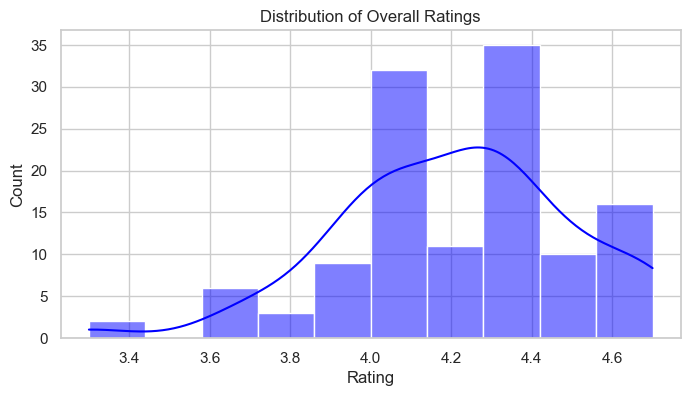

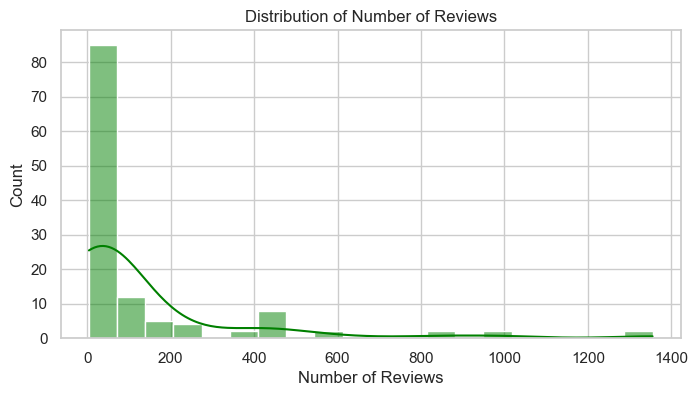

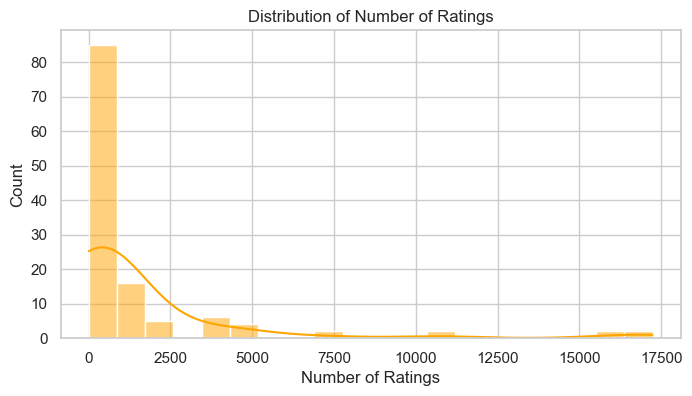

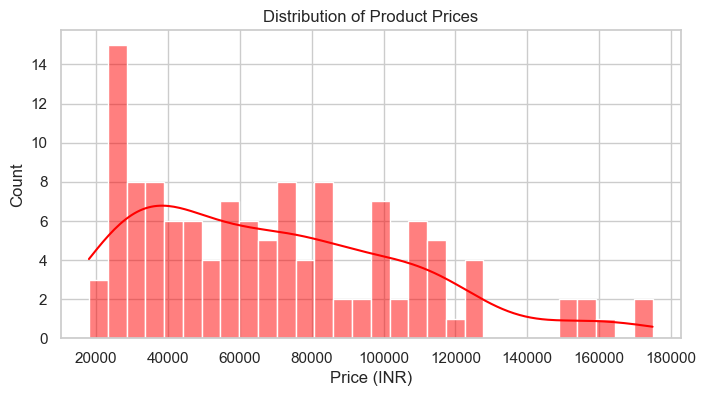

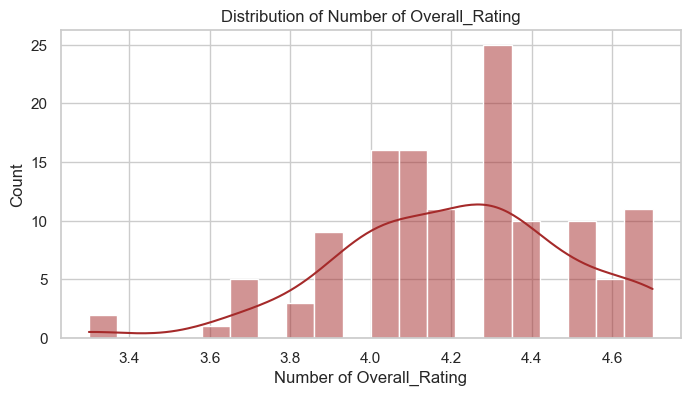

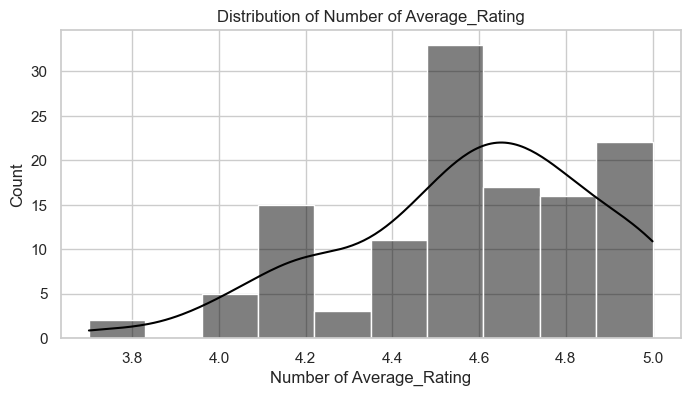

In [231]:
sns.set(style = "whitegrid")

plot_configs = [ # Columns, Bins, Color, Title, xlabel
                ("Overall_Rating", 10, 'blue', "Distribution of Overall Ratings", "Rating"),
                ("No_of_Reviews", 20, 'green', "Distribution of Number of Reviews", "Number of Reviews"),
                ("No_of_Ratings", 20, 'orange', "Distribution of Number of Ratings", "Number of Ratings"),
                ("Price", 30, 'red', "Distribution of Product Prices", "Price (INR)"),
                ("Overall_Rating", 20, 'brown', "Distribution of Number of Overall_Rating", "Number of Overall_Rating"),
                ("Average_Rating", 10, 'black', "Distribution of Number of Average_Rating", "Number of Average_Rating"),
]

for col, bins, color, title, xlabel in plot_configs:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=bins, kde=True, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

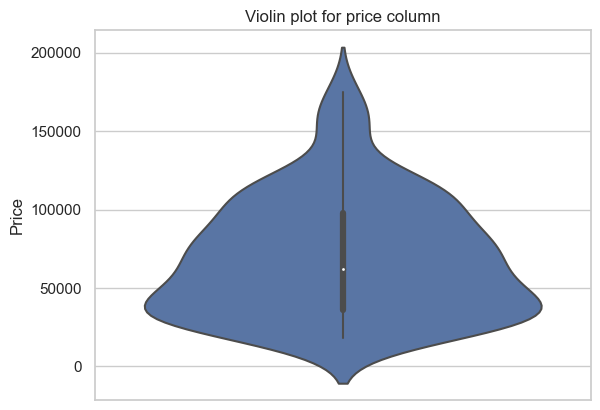

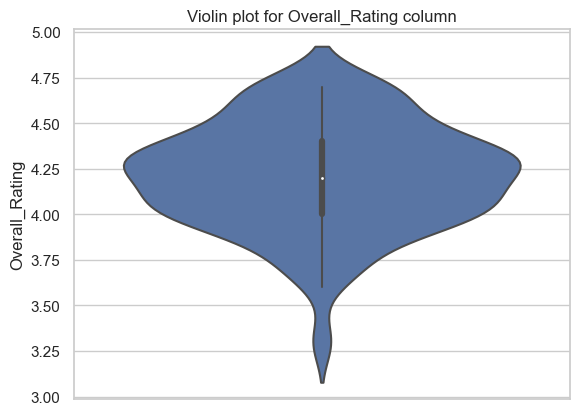

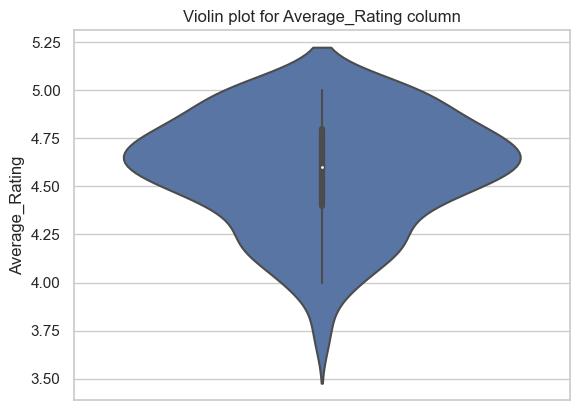

In [232]:
# Combines box plot and KDE for better distribution + outlier detection.
sns.violinplot(y=df['Price'])
plt.title('Violin plot for price column')
plt.show()

sns.violinplot(y=df['Overall_Rating'])
plt.title('Violin plot for Overall_Rating column')
plt.show()

sns.violinplot(y=df['Average_Rating'], title='Voilin plot for price column')
plt.title('Violin plot for Average_Rating column')
plt.show()

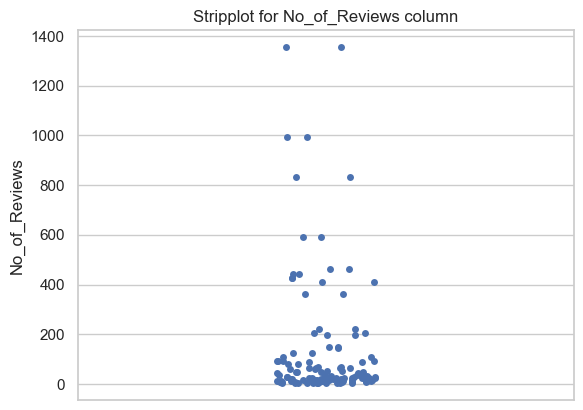

In [233]:
# Displaying all data points along with jittering to reveal distribution and density.

sns.stripplot(y=df['No_of_Reviews'], jitter=True)
plt.title('Stripplot for No_of_Reviews column')
plt.show()

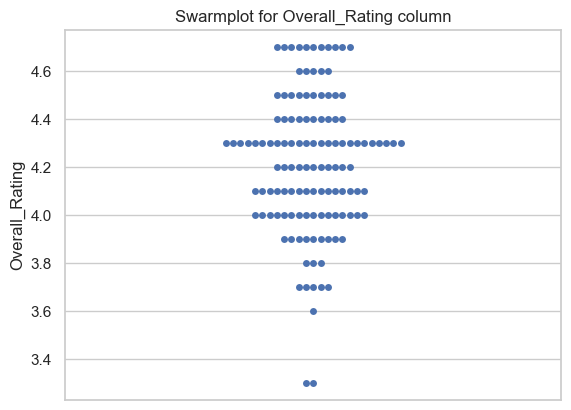

In [234]:
# A more refined alternative to strip plot — avoids overlapping points.

sns.swarmplot(y=df['Overall_Rating'])
plt.title('Swarmplot for Overall_Rating column')
plt.show()

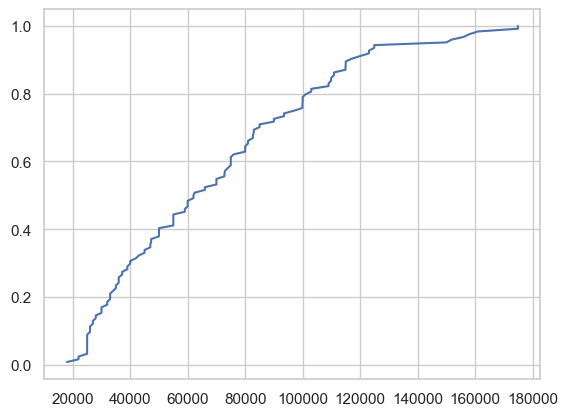

In [235]:
# ECDF (Empirical Cumulative Distribution Function)
# Helps to understand the percentile distribution.

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['Price'])
plt.plot(ecdf.x, ecdf.y)
plt.show()

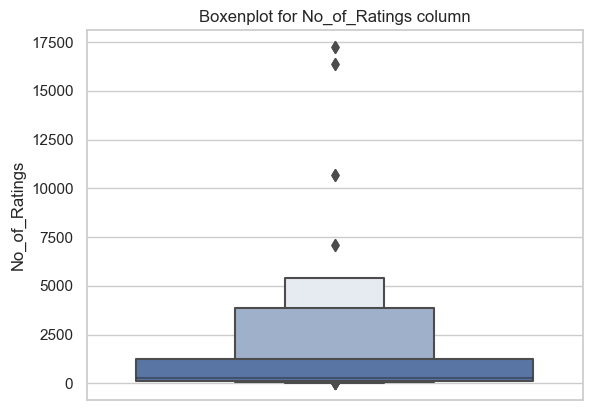

In [236]:
# Better suited than box plots for large datasets with long tails.

sns.boxenplot(y=df['No_of_Ratings'])
plt.title('Boxenplot for No_of_Ratings column')
plt.show()

### Categorical Columns

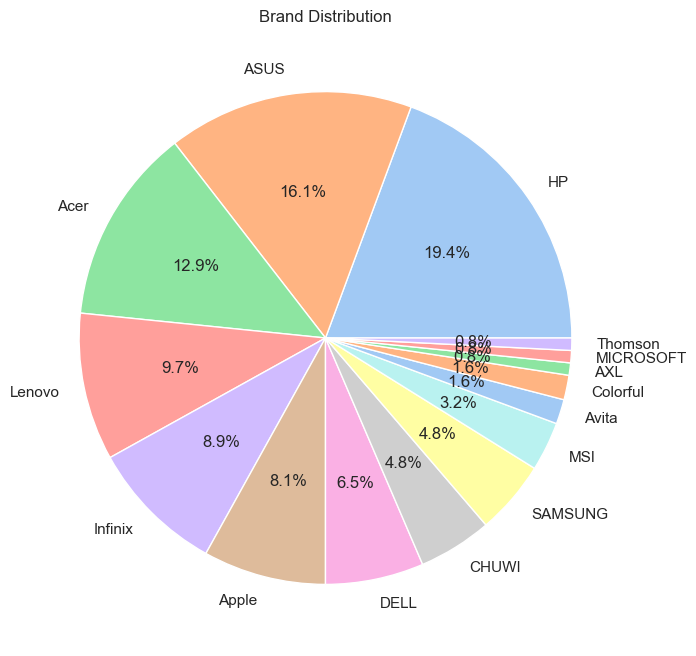

In [238]:
brand_counts = df['Brand'].value_counts()

# Plotting a pie chart for brand distribution
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel", len(brand_counts)))
plt.title('Brand Distribution')
plt.show()

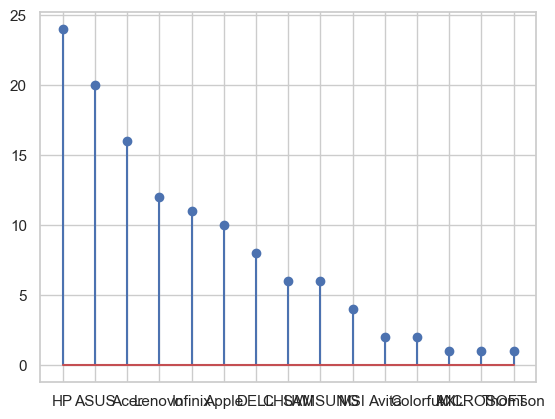

In [239]:
# A variant of pie chart, aesthetically better for few categories like Brand.

brands = df['Brand'].value_counts()
plt.stem(brands.index, brands.values)
plt.title('')
plt.show()

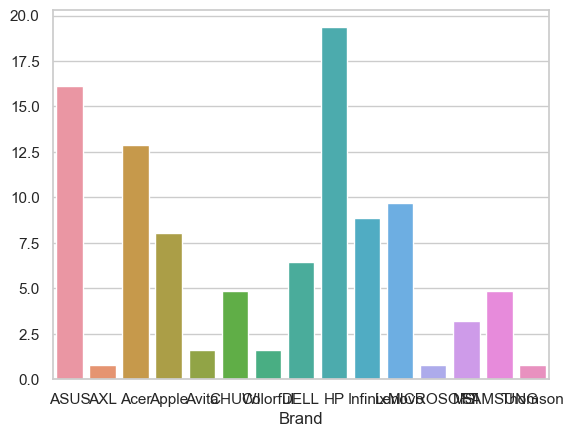

In [240]:
# Helps see proportions rather than just frequency.

brand_counts = df['Brand'].value_counts(normalize=True) * 100

sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.show()

In [241]:
df.columns

Index(['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model',
       'Specifications', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating',
       'Average_Rating', 'Price', 'Review_Titles', 'Review_Texts'],
      dtype='object')

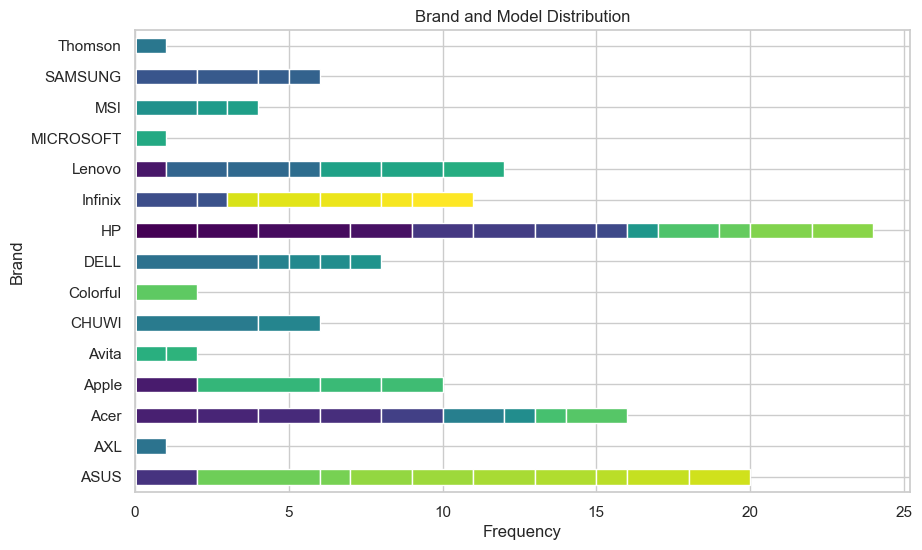

In [242]:
# stacked barplot for Brand, Model 

brand_model_counts = df.groupby('Brand')['Model'].value_counts().unstack().fillna(0)

ax = brand_model_counts.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis', legend=False)
plt.title('Brand and Model Distribution')
plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.show()

### Bivariate Analysis

**Scatter Plot Matrix (Pairplot)**

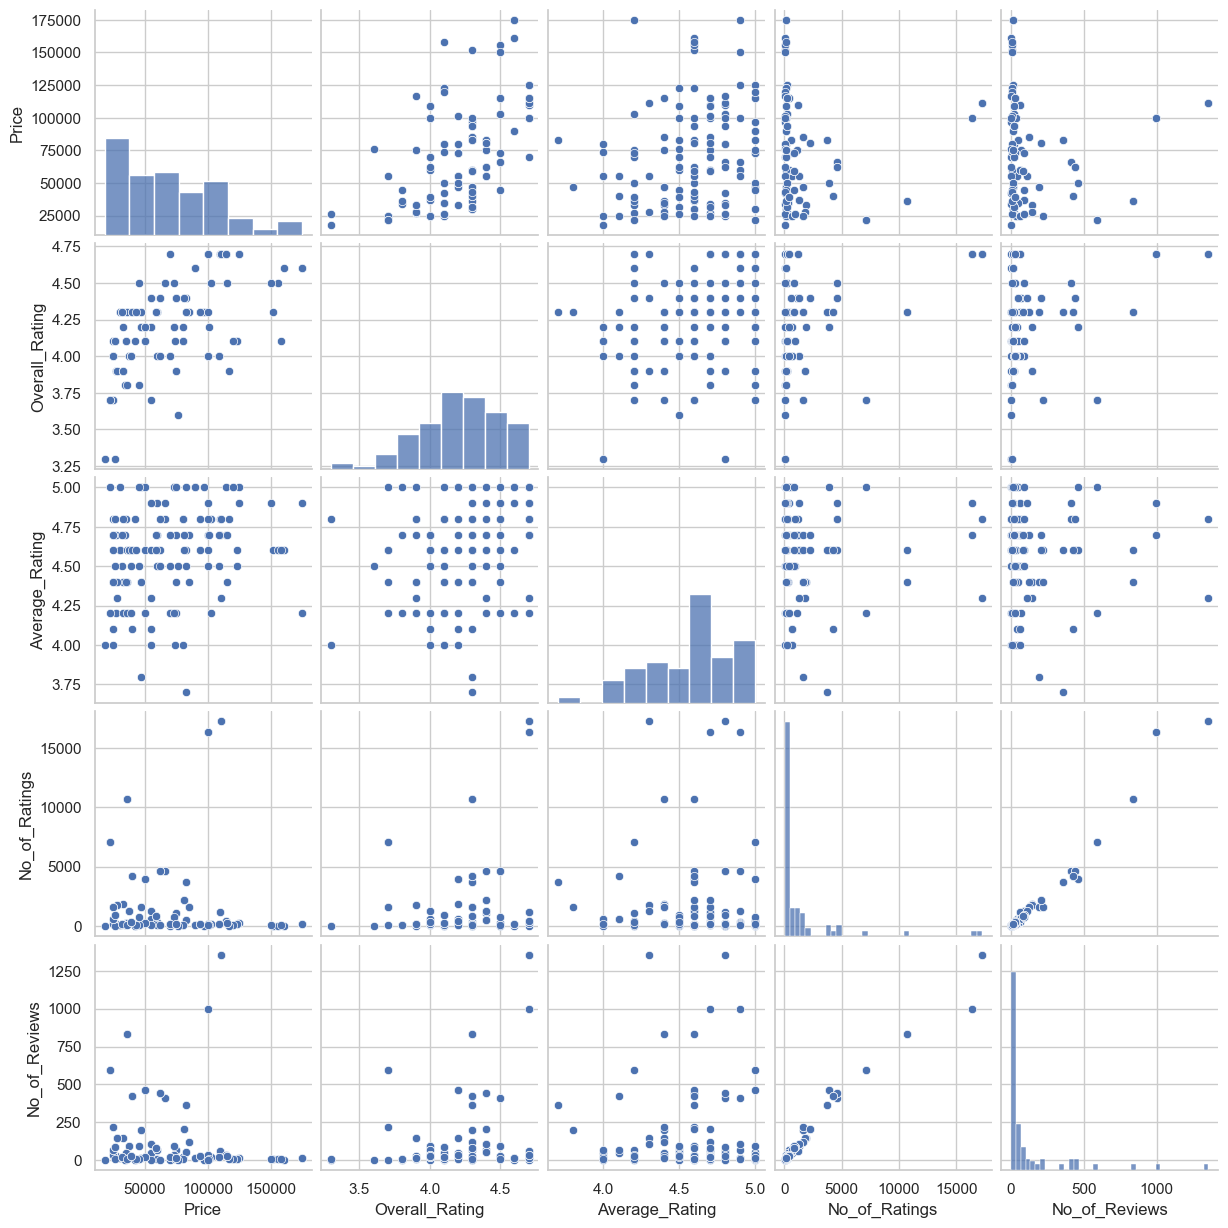

In [245]:
# Pairplot for multiple columns
sns.pairplot(df[['Price', 'Overall_Rating', 'Average_Rating', 'No_of_Ratings', 'No_of_Reviews']])
plt.show()

- To see pairwise relationships between multiple numerical variables

**Heatmap of Correlation Matrix**

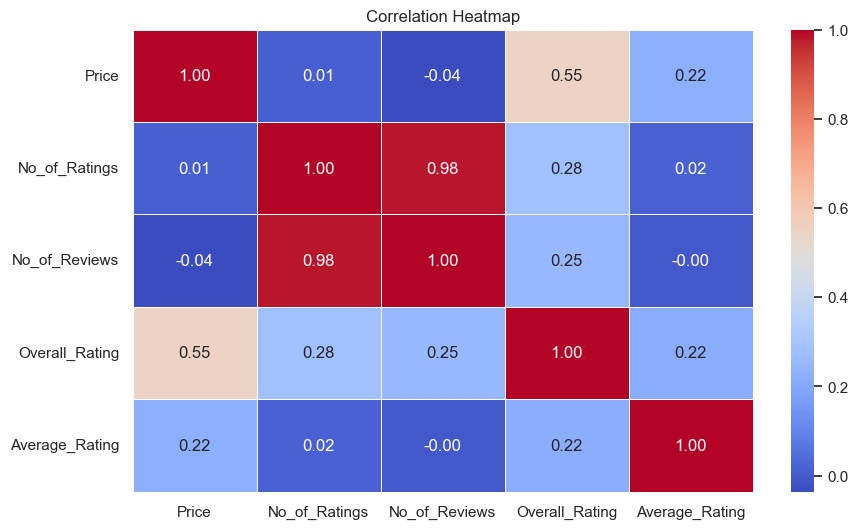

In [248]:
corr_matrix = df[['Price', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

-  A heatmap is an effective way to show the correlation between multiple variables at once, which helps in identifying strong or weak correlations

**Bubble Plot**

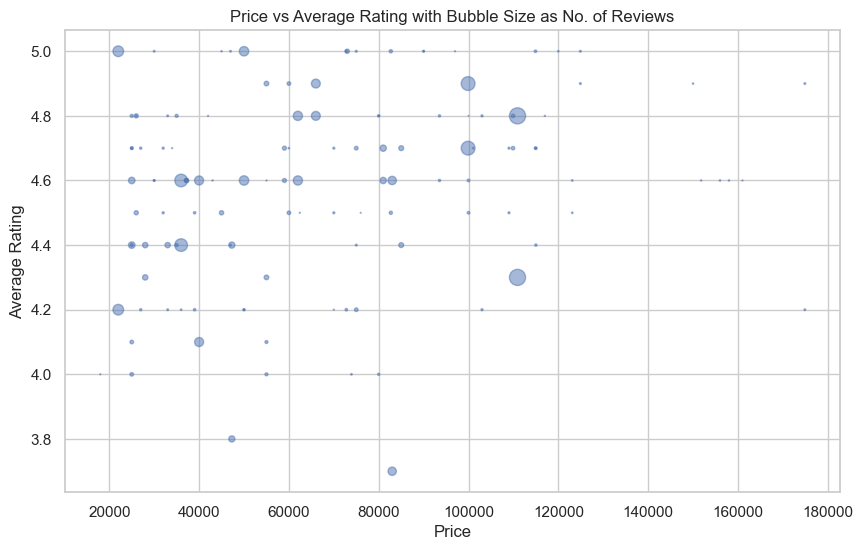

In [251]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Average_Rating'], s=df['No_of_Reviews'] / 10, alpha=0.5, color='b')
plt.title('Price vs Average Rating with Bubble Size as No. of Reviews')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

- A variation of the scatter plot, where the size of each point corresponds   to another variable

**Hexbin Plot**

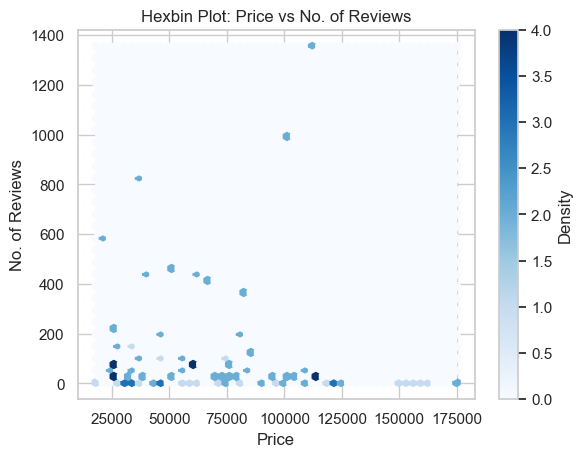

In [254]:
plt.hexbin(df['Price'], df['No_of_Reviews'], gridsize=50, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot: Price vs No. of Reviews')
plt.xlabel('Price')
plt.ylabel('No. of Reviews')
plt.show()

- Hexagonal binning plot is useful for visualizing the density of points in a scatter plot, especially when dealing with large datasets.

**Violin Plot for Bivariate Distribution**

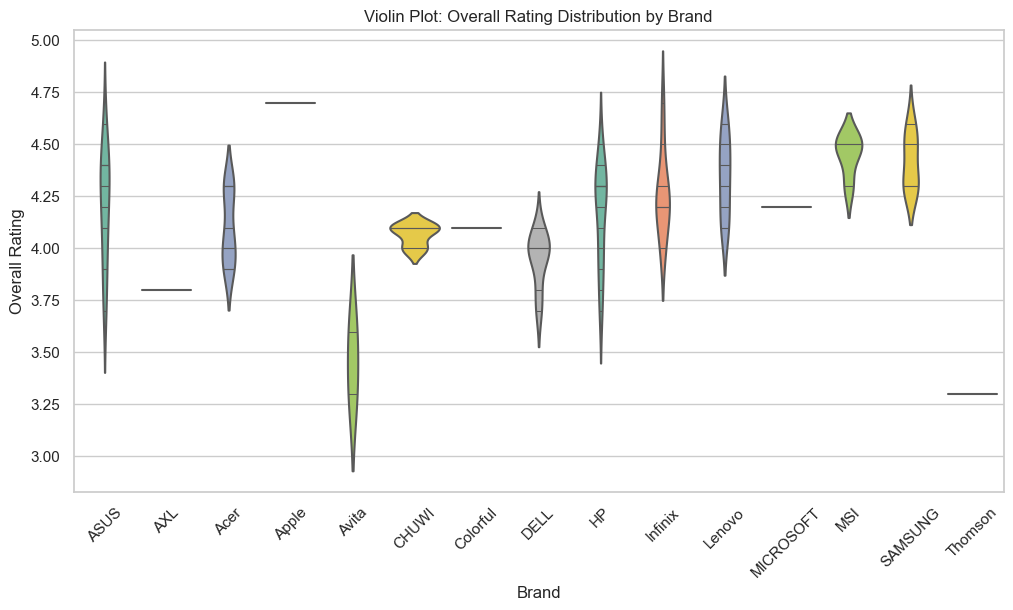

In [260]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Brand', y='Overall_Rating', data=df, inner="stick", palette='Set2')
plt.xticks(rotation=45)
plt.title('Violin Plot: Overall Rating Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Overall Rating')
plt.show()

- To compare the distribution of Overall_Rating for different Brands. You can also use this to compare categorical variables against numerical ones.

**Regression Plot**

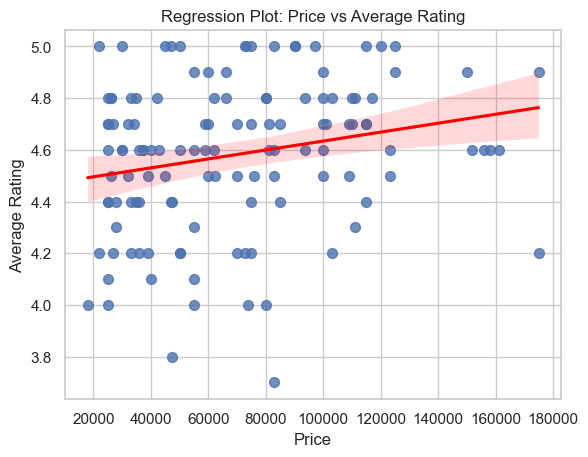

In [263]:
sns.regplot(x='Price', y='Average_Rating', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Price vs Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

- To study the linear relationship between two variables while also displaying a regression line. You can use this to study relationships like Price vs Average_Rating.

**Joint Plot**

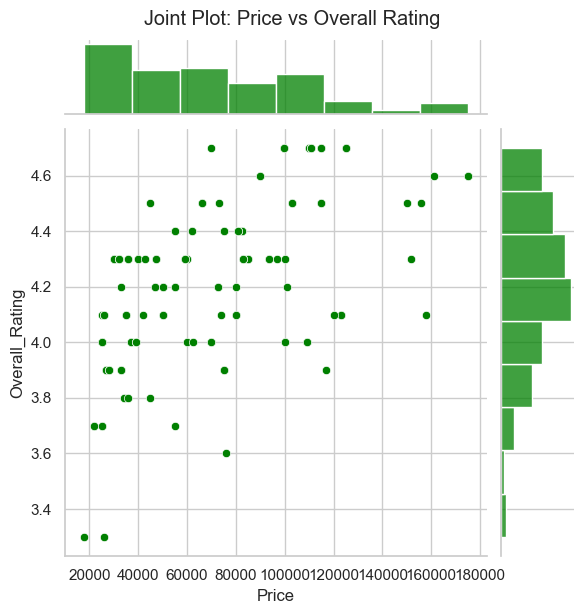

In [266]:
sns.jointplot(x='Price', y='Overall_Rating', data=df, kind='scatter', color='green')
plt.suptitle('Joint Plot: Price vs Overall Rating', y=1.02)
plt.show()

- Combines a scatter plot and histogram to show the distribution of two variables and their relationship.

**Bar Plot with Error Bars**

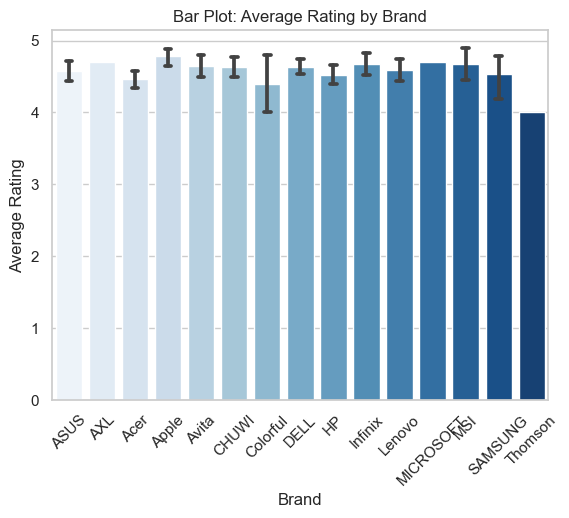

In [269]:
sns.barplot(x='Brand', y='Average_Rating', data=df, capsize=0.2, palette='Blues')
plt.title('Bar Plot: Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

- If you are comparing aggregate statistics (like mean rating) between different brands, you can use a bar plot with error bars to represent variability.

### Multivariate Analysis

**3D Scatter Plot**

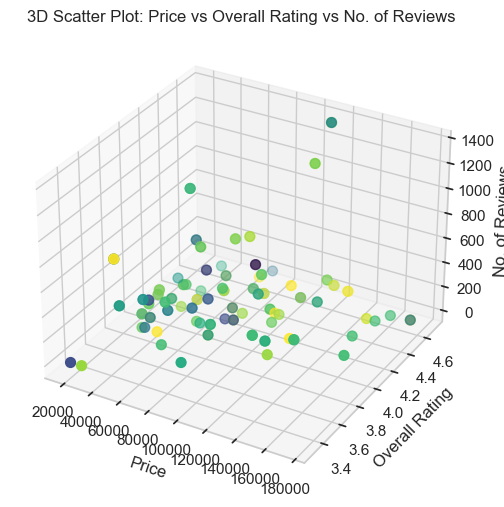

In [273]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Price'], df['Overall_Rating'], df['No_of_Reviews'], c=df['Average_Rating'], cmap='viridis', s=50)
ax.set_xlabel('Price')
ax.set_ylabel('Overall Rating')
ax.set_zlabel('No. of Reviews')

plt.title('3D Scatter Plot: Price vs Overall Rating vs No. of Reviews')
plt.show()

**Facet Grid**

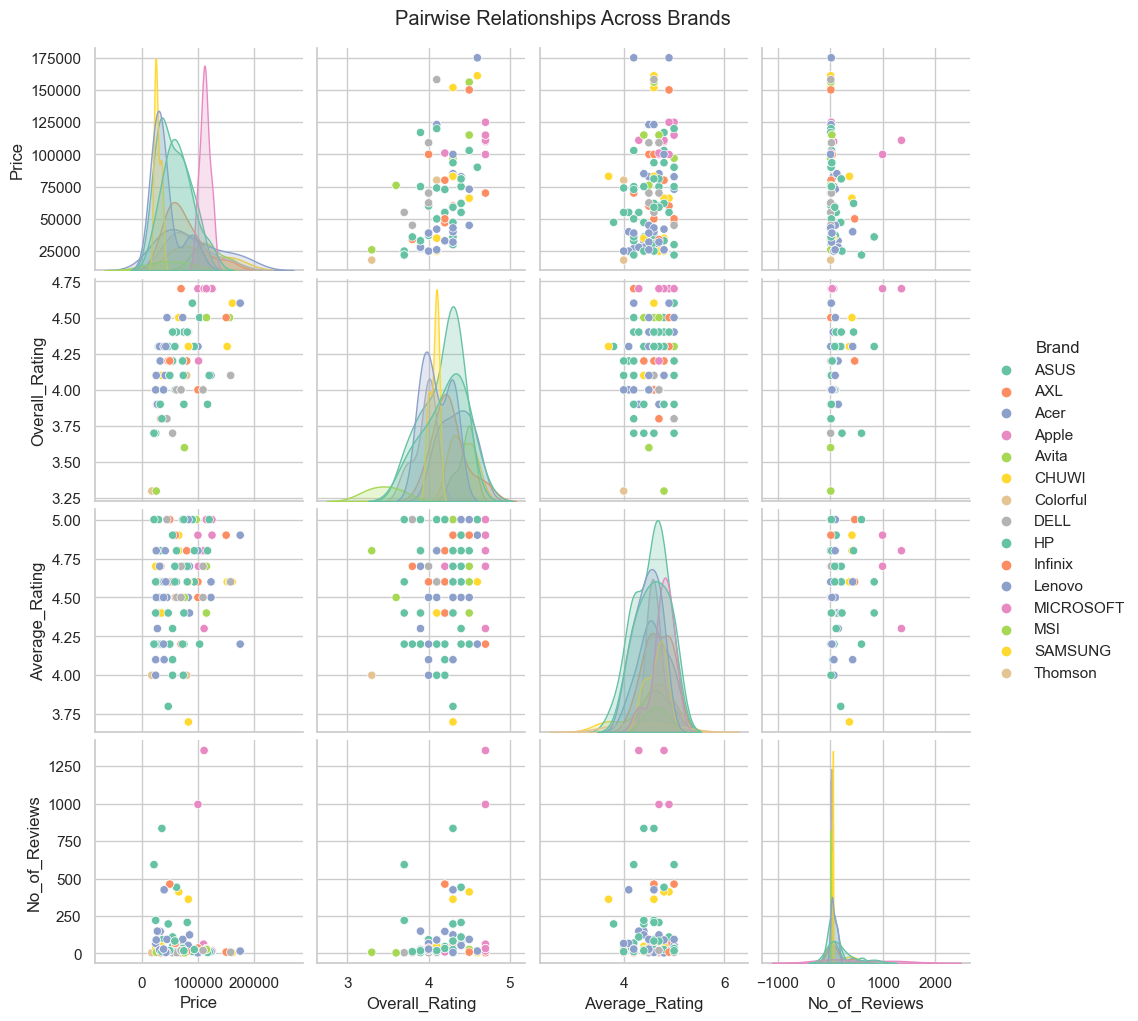

In [275]:
sns.pairplot(df, hue='Brand', vars=['Price', 'Overall_Rating', 'Average_Rating', 'No_of_Reviews'], palette='Set2')
plt.suptitle('Pairwise Relationships Across Brands', y=1.02)
plt.show()

- Visualize pairwise relationships between variables while splitting by a categorical variable 

**Heatmap with Clusters (Hierarchical Clustering)**

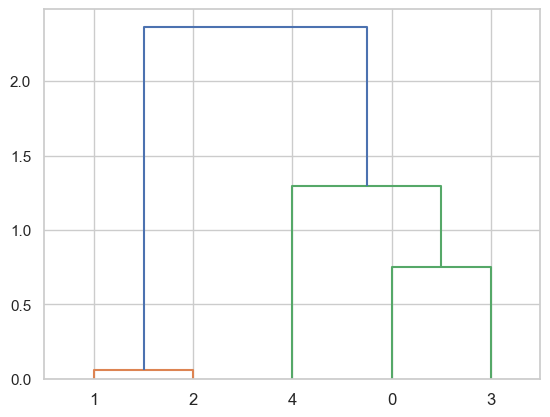

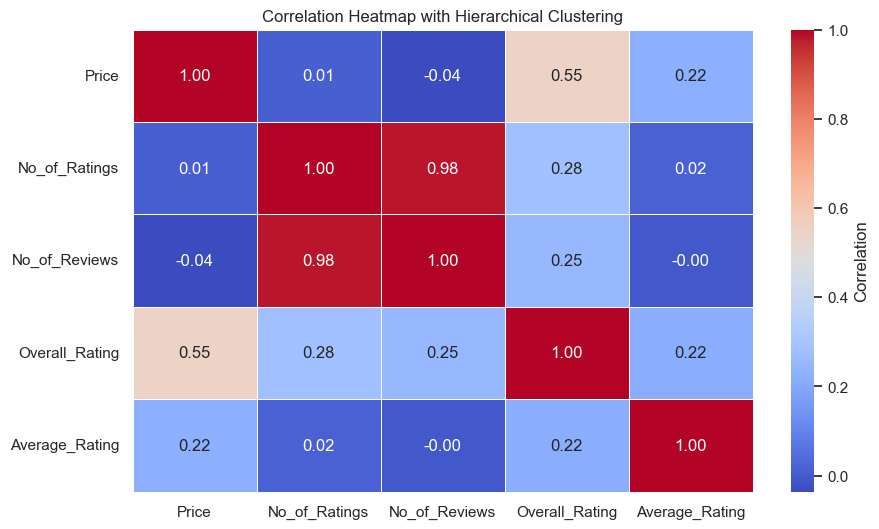

In [278]:
import scipy.cluster.hierarchy as sch

corr_matrix = df[['Price', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating']].corr()
dendrogram = sch.dendrogram(sch.linkage(corr_matrix, method='ward'))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap with Hierarchical Clustering')
plt.show()

- Visualize the relationships between multiple variables and perform clustering to detect patterns.

**Bubble Plot with Three Variables**

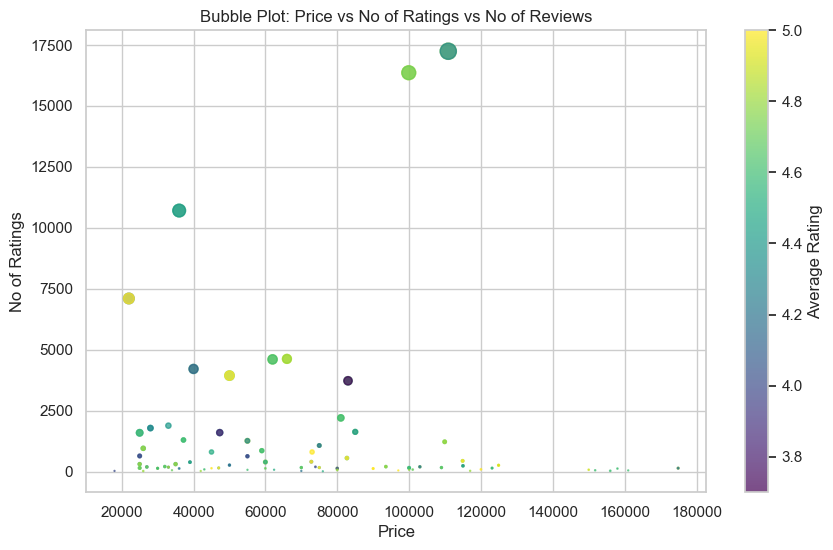

In [357]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['No_of_Ratings'], s=df['No_of_Reviews'] / 10, alpha=0.7, c=df['Average_Rating'], cmap='viridis')

plt.title('Bubble Plot: Price vs No of Ratings vs No of Reviews')
plt.xlabel('Price')
plt.ylabel('No of Ratings')
plt.colorbar(label='Average Rating')
plt.show()

- A variation of the scatter plot where the size of the bubbles represents a third variable.

**Parallel Coordinates Plot**

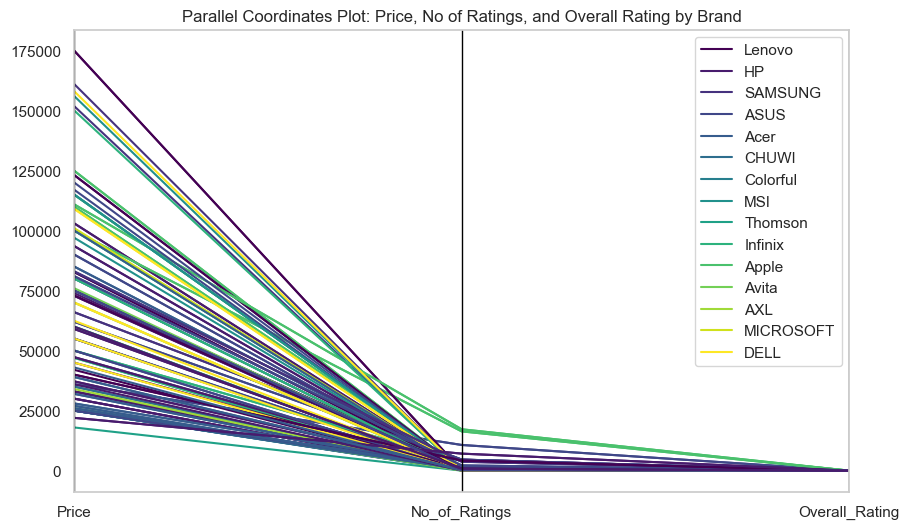

In [284]:
from pandas.plotting import parallel_coordinates

df['Brand'] = df['Brand'].astype('category')

plt.figure(figsize=(10, 6))
parallel_coordinates(df[['Price', 'No_of_Ratings', 'Overall_Rating', 'Brand']], 'Brand', colormap='viridis')
plt.title('Parallel Coordinates Plot: Price, No of Ratings, and Overall Rating by Brand')
plt.show()

- Show the relationships between multiple continuous variables across different categorical levels.

**Radar Chart**

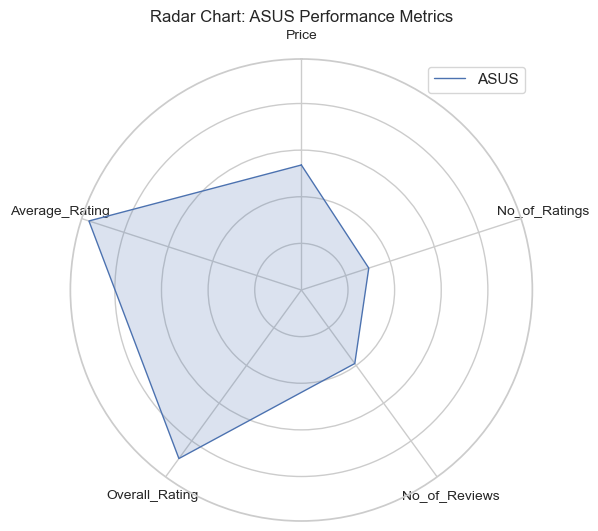

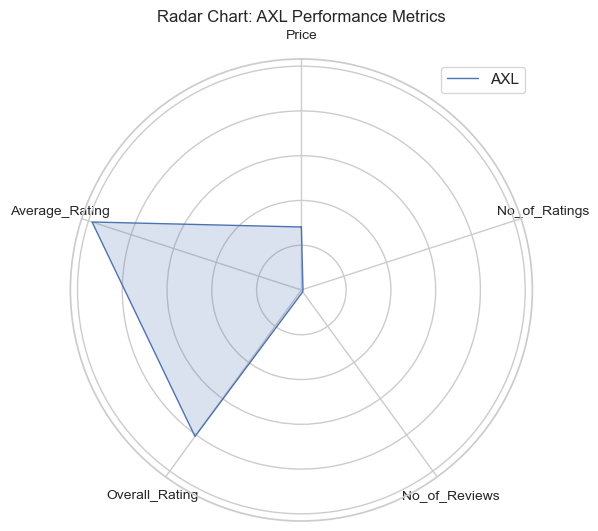

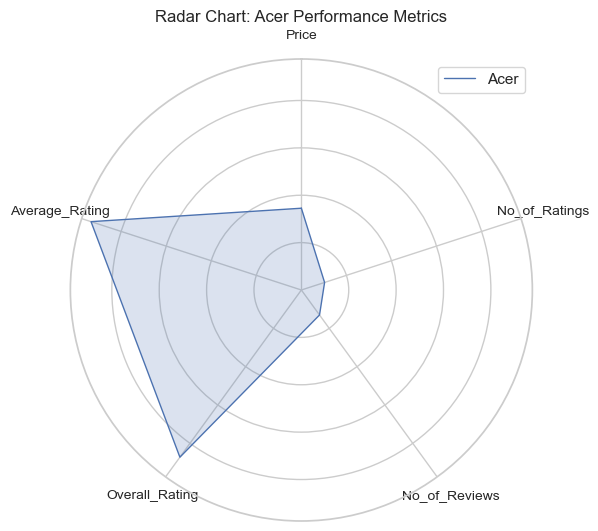

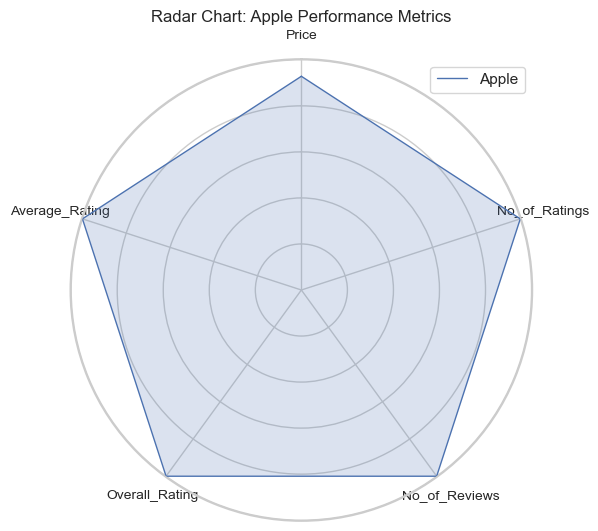

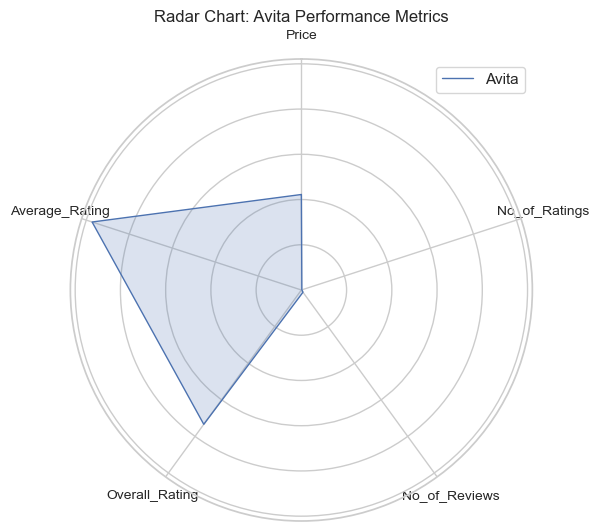

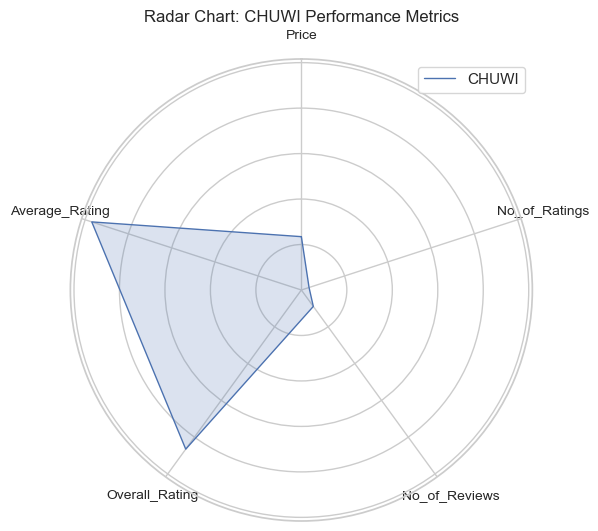

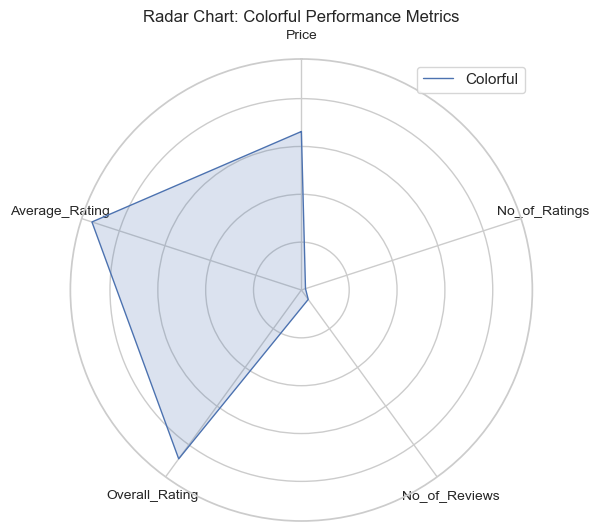

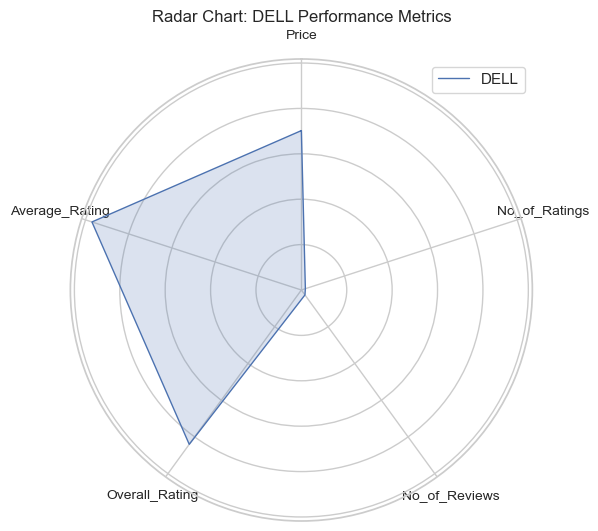

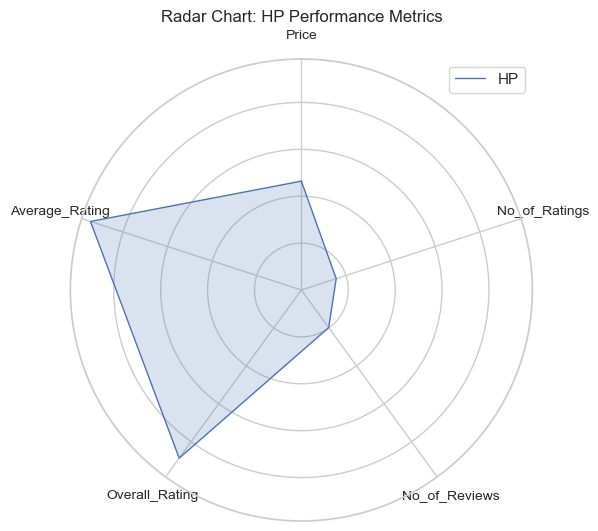

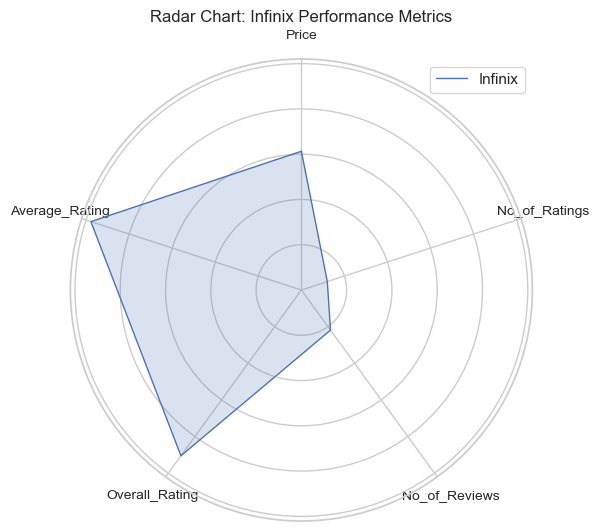

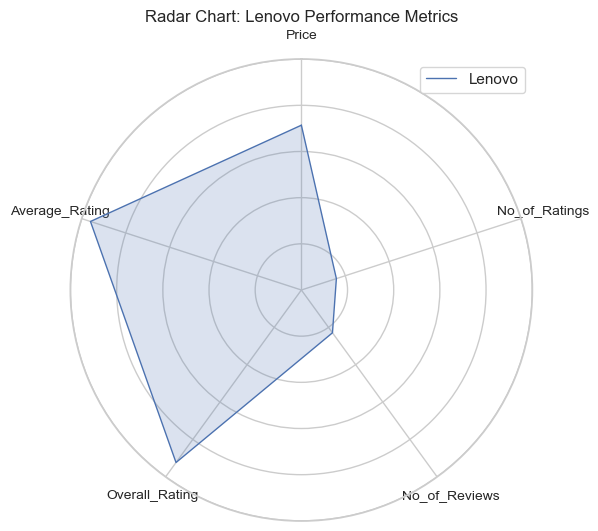

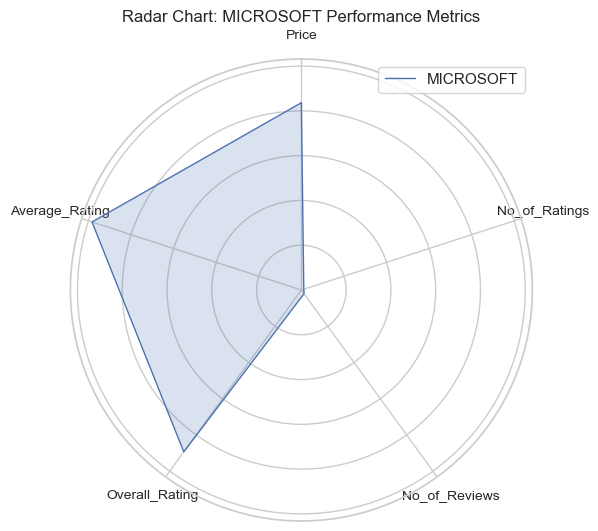

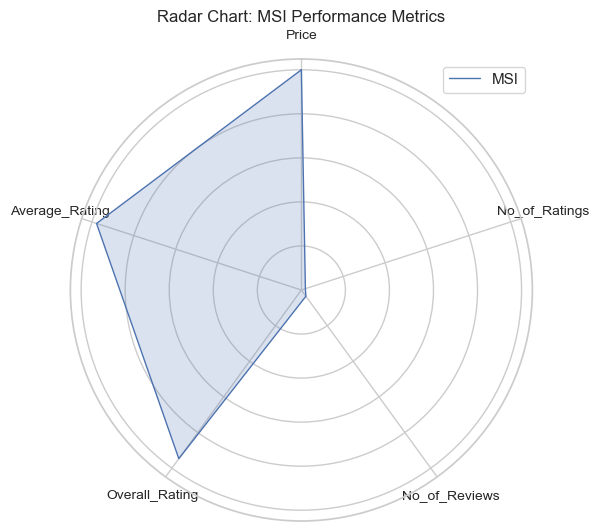

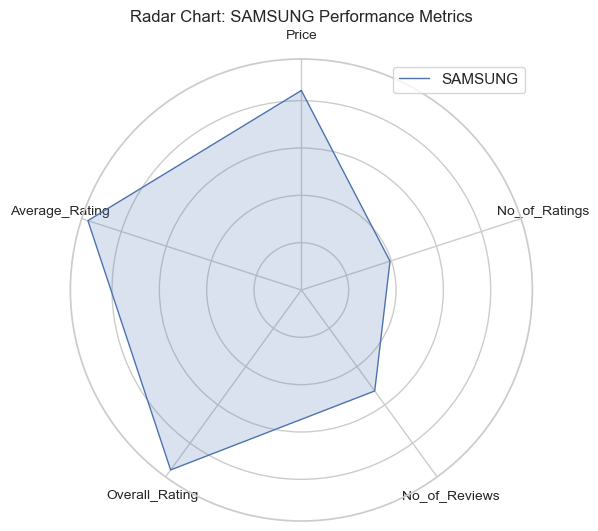

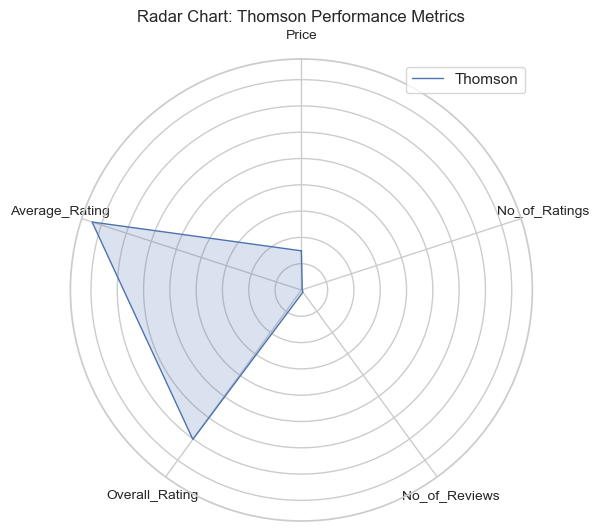

In [287]:
from math import pi

brand_data = df[['Brand', 'Price', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating']].groupby('Brand').mean()
normalized_data = brand_data / brand_data.max(axis=0)

categories = normalized_data.columns
N = len(categories)

for brand in normalized_data.index:
    values = normalized_data.loc[brand].values.flatten().tolist()
    values += values[:1]
    
    # Defining the angle of each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=brand)
    ax.fill(angles, values, alpha=0.2)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    
    plt.title(f'Radar Chart: {brand} Performance Metrics')
    plt.legend(loc='upper right')
    plt.show()

- Visualize the multivariate comparison of several numerical variables for a categorical variable

### Pairwise Contour Plots using KDE

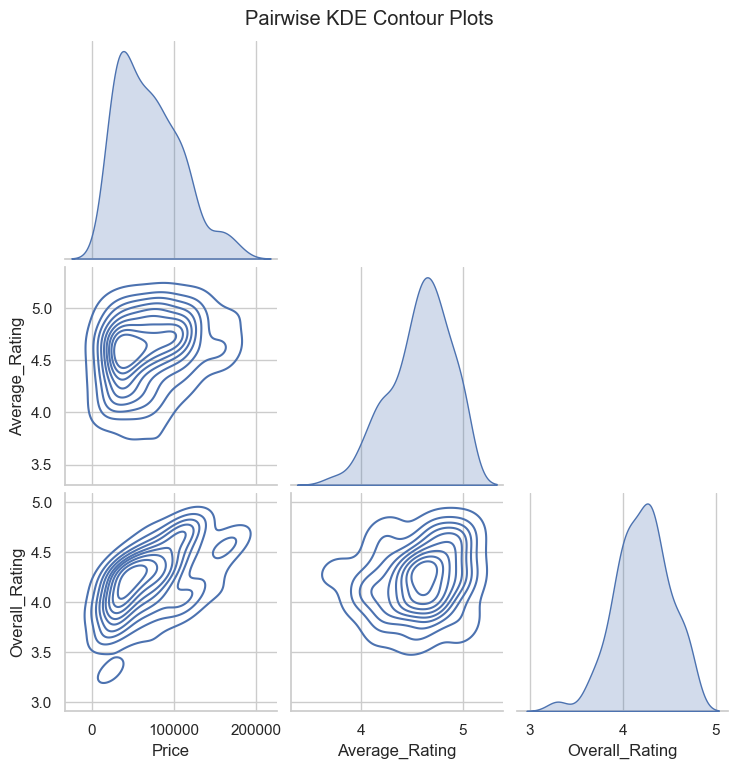

In [290]:
# Creating pairwise KDE plots
sns.pairplot(df[['Price', 'Average_Rating', 'Overall_Rating']], kind='kde', diag_kind='kde', corner=True)
plt.suptitle('Pairwise KDE Contour Plots', y=1.02)
plt.show()

### Creating price Buckets

In [292]:
df['Price_Bucket'] = pd.cut(df['Price'], bins=[0, 30000, 40000, float('inf')],
                            labels=['<30k', '30k-40k', '40k+'])

df['Rating_Level'] = pd.cut(df['Average_Rating'], bins=[0, 3.5, 4.0, 5.0],
                            labels=['Low', 'Medium', 'High'])


**Cross-tab Heatmap**

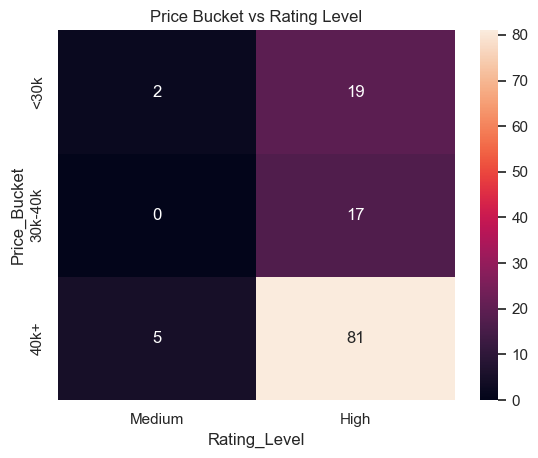

In [294]:
heatmap_data = pd.crosstab(df['Price_Bucket'], df['Rating_Level'])
sns.heatmap(heatmap_data, annot=True, cmap='rocket')
plt.title("Price Bucket vs Rating Level")
plt.show()

**Average Number of Reviews in Each Segment**

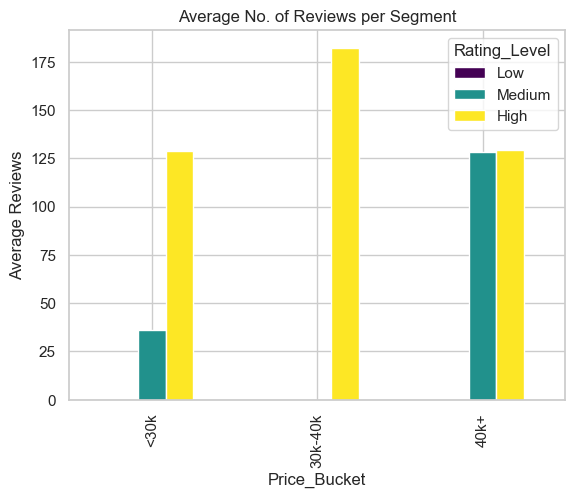

In [296]:
avg_reviews = df.groupby(['Price_Bucket', 'Rating_Level'])['No_of_Reviews'].mean().unstack()
avg_reviews.plot(kind='bar', colormap='viridis')
plt.title("Average No. of Reviews per Segment")
plt.ylabel("Average Reviews")
plt.show()

**Count of Products**

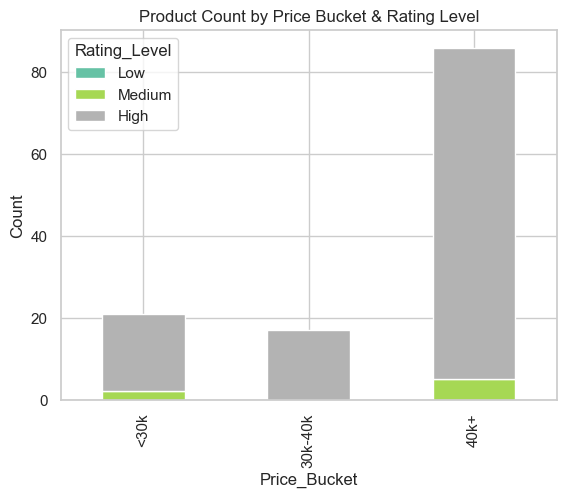

In [298]:
count_data = df.groupby(['Price_Bucket', 'Rating_Level']).size().unstack()
count_data.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Product Count by Price Bucket & Rating Level")
plt.ylabel("Count")
plt.show()

**Box Plot of Rating per Price Bucket**

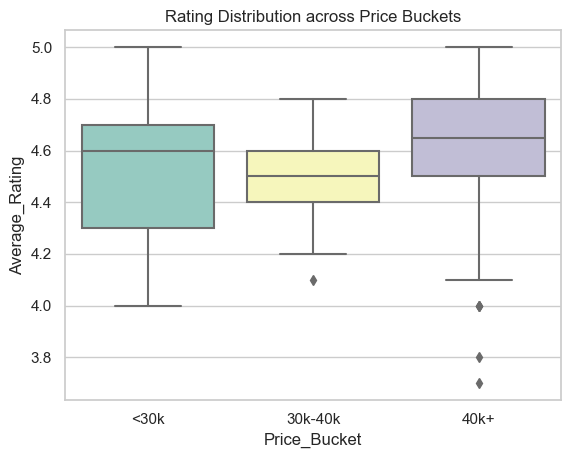

In [300]:
sns.boxplot(x='Price_Bucket', y='Average_Rating', data=df, palette='Set3')
plt.title("Rating Distribution across Price Buckets")
plt.show()

**Violin Plot for Price vs Rating Level**

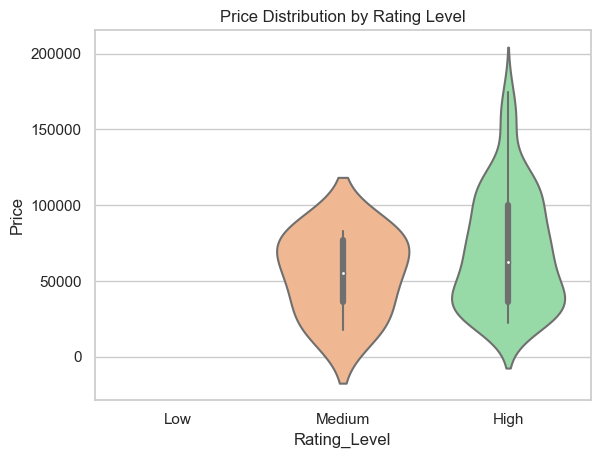

In [302]:
sns.violinplot(x='Rating_Level', y='Price', data=df, palette='pastel')
plt.title("Price Distribution by Rating Level")
plt.show()

### Extracting ram and storage from sepcifications column

In [304]:
df['RAM_GB'] = df['Specifications'].str.extract(r'(\d+)\s*GB', expand=False)
df['RAM_GB'] = pd.to_numeric(df['RAM_GB'], errors='coerce') 

df['Storage'] = df['Specifications'].str.extract(r'/([\d\s]+(?:GB|TB))', expand=False)

# Converting Storage to GB
def convert_storage(val):
    if pd.isna(val):
        return None
    val = val.strip().upper()
    if 'TB' in val:
        return float(val.replace('TB', '').strip()) * 1024
    if 'GB' in val:
        return float(val.replace('GB', '').strip())
    return None

df['Storage_GB'] = df['Storage'].apply(convert_storage)
df['OS_Version'] = df['Specifications'].str.extract(r'/([^/]*Windows[^/]*)', expand=False)

df.head()

Unique_ID                                        Product_URL  \
0         62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4         71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                       Product_Title    Brand  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   Lenovo   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...  SAMSUNG   

                                        Model  \
0  IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
2  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
3  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
4   Galaxy Book4 Intel Core i5 13th Gen 1335U   

                     Specifications  No_of_Ratings  No_of_Reviews  \
0  16 GB/512 GB SSD/Windows 11 Home         1882.0          147.0   
1   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
2   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
3   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
4  16 GB/512 GB SSD/Windows 11 Home         4620.0          411.0   

   Overall_Rating  Average_Rating    Price  \
0             4.2             4.4  32990.0   
1             4.3             5.0  29990.0   
2             4.3             4.6  29990.0   
3             4.3             4.6  29990.0   
4             4.5             4.9  65990.0   

                                       Review_Titles  \
0  excellent for this priceconfiguration simply a...   
1  unsatisfactory highly recommended super worth ...   
2  terrific purchase really nice terrific must bu...   
3                                            Unknown   
4  terrific purchase fabulous awesome nice produc...   

                                        Review_Texts Price_Bucket  \
0  lenovo ideapad ryzen hexa core u gb gb ssd win...      30k-40k   
1  very poor quality best studentsbest official u...         <30k   
2  best laptop normal usage budget best backlit k...         <30k   
3                                            Unknown         <30k   
4  that nice laptop price find laptop college wor...         40k+   

  Rating_Level  RAM_GB Storage  Storage_GB       OS_Version  
0         High      16  512 GB       512.0  Windows 11 Home  
1         High       8  512 GB       512.0  Windows 11 Home  
2         High       8  512 GB       512.0  Windows 11 Home  
3         High       8  512 GB       512.0  Windows 11 Home  
4         High      16  512 GB       512.0  Windows 11 Home

In [305]:
df['OS_Version'] = df['OS_Version'].fillna('Not specified')

In [306]:
print(df['RAM_GB'].unique())
print(df['Storage_GB'].unique())

[16  8  4 24 12]
[ 512. 1024.  256.  128.   64.]


**Ram and Storage Distribution**

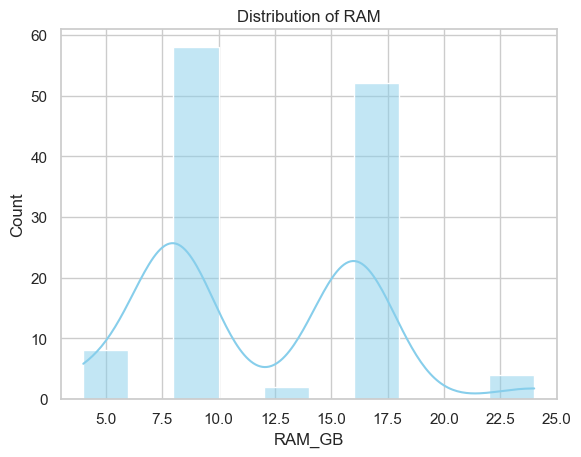

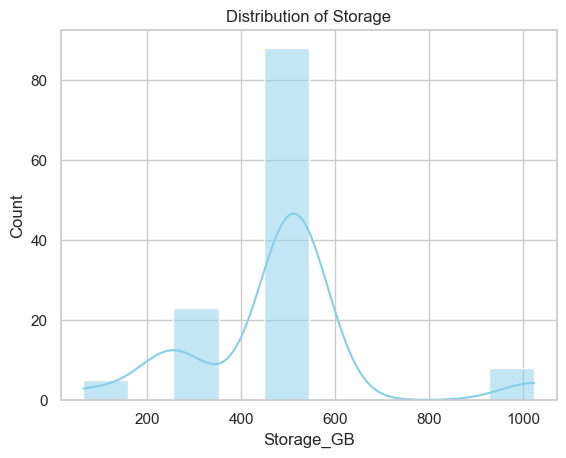

In [308]:
# RAM
sns.histplot(df['RAM_GB'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of RAM")
plt.show()

# Storage
sns.histplot(df['Storage_GB'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Storage")
plt.show()

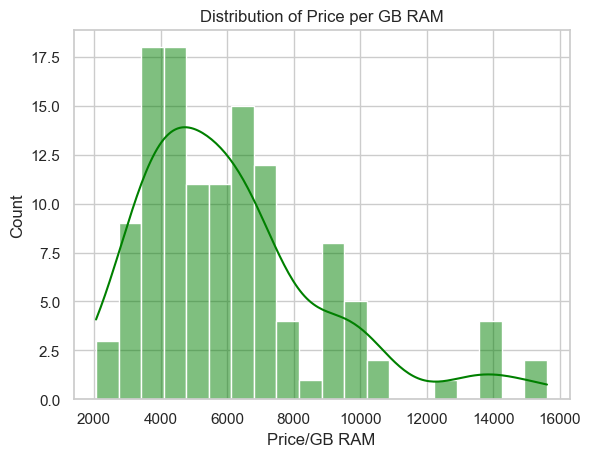

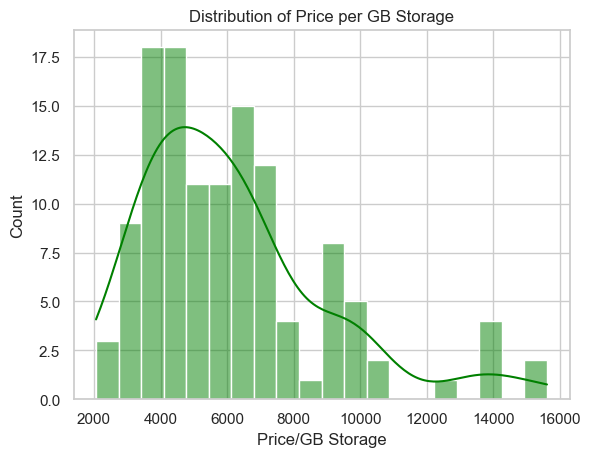

In [309]:
df['Price_per_GB_RAM'] = df['Price'] / df['RAM_GB']
df['Price_per_GB_Storage'] = df['Price'] / df['Storage_GB']

sns.histplot(df['Price_per_GB_RAM'], kde=True, bins=20, color='green')
plt.title("Distribution of Price per GB RAM")
plt.xlabel("Price/GB RAM")
plt.show()


df['Price_per_GB_Storage'] = df['Price'] / df['RAM_GB']
sns.histplot(df['Price_per_GB_Storage'], kde=True, bins=20, color='green')
plt.title("Distribution of Price per GB Storage")
plt.xlabel("Price/GB Storage")
plt.show()

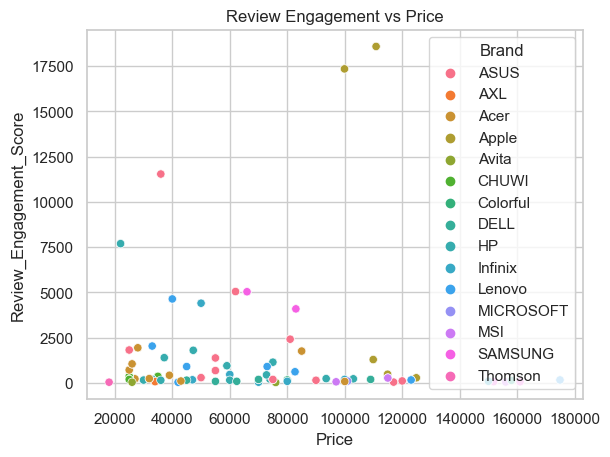

In [310]:
df['Review_Engagement_Score'] = df['No_of_Reviews'] + df['No_of_Ratings']

sns.scatterplot(x='Price', y='Review_Engagement_Score', hue='Brand', data=df)
plt.title("Review Engagement vs Price")
plt.show()

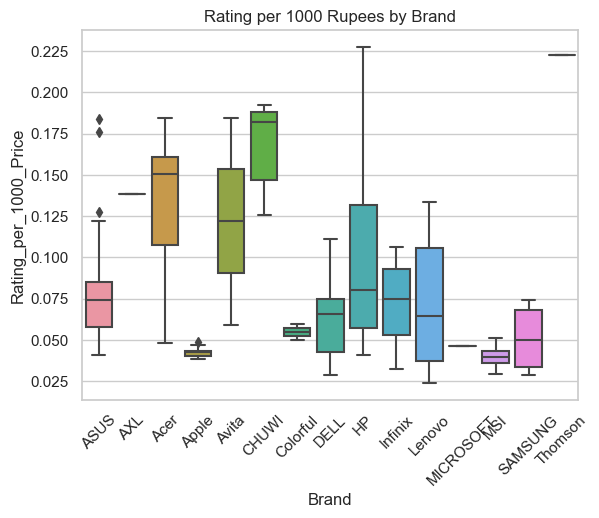

In [311]:
df['Rating_per_1000_Price'] = df['Average_Rating'] / (df['Price'] / 1000)

sns.boxplot(x='Brand', y='Rating_per_1000_Price', data=df)
plt.title("Rating per 1000 Rupees by Brand")
plt.xticks(rotation=45)
plt.show()

### Sentiment Analysis

In [313]:
# Assigning the sentiment to the reviews

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Review_Texts'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Review_Sentiment'] = df['Sentiment_Score'].apply(classify)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jvpurushotham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


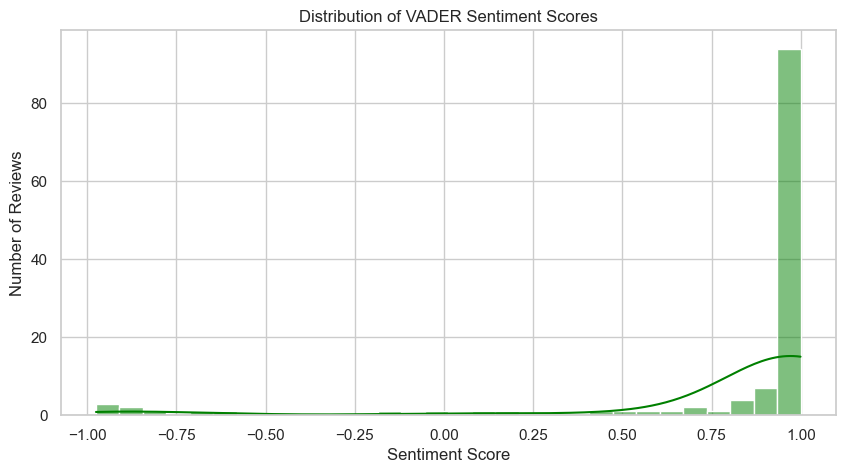

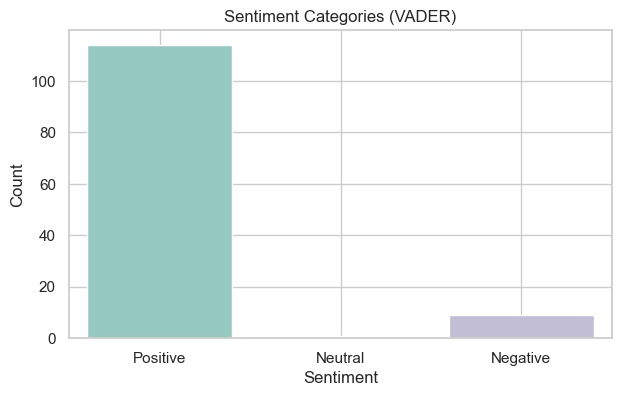

In [314]:
# Plotting the histogram of sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True, color='green')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# Plotting the sentiment label distribution
plt.figure(figsize=(7,4))
sns.countplot(x='Review_Sentiment', data=df, palette='Set3')
plt.title('Sentiment Categories (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [315]:
print(df['Review_Sentiment'].value_counts())

Review_Sentiment
Positive    114
Negative      9
Neutral       1
Name: count, dtype: int64


**Word Frequency Count**

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jvpurushotham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


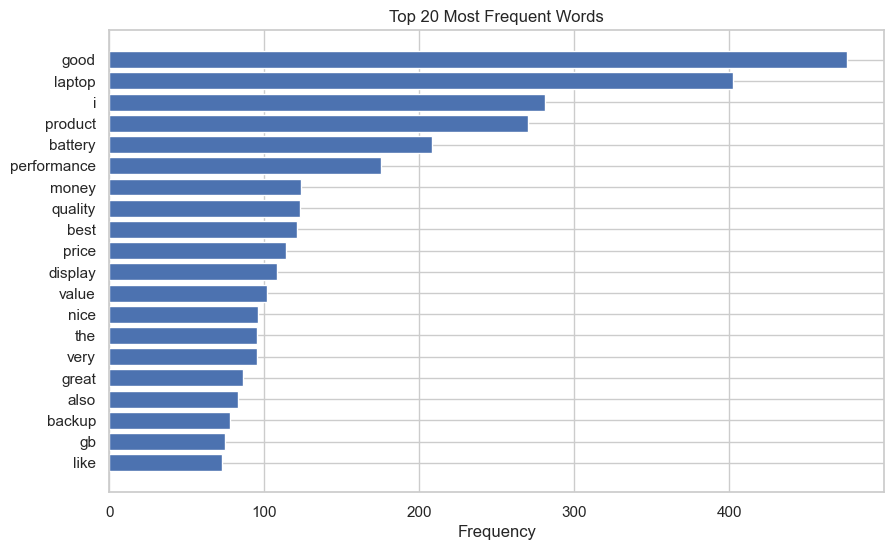

In [317]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')

all_reviews = ' '.join(df['Review_Texts'].dropna())
tokens = word_tokenize(all_reviews)

word_freq = Counter(tokens)

# Plotting the 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

### Keyword Extraction

In [319]:
from collections import Counter

# Keyword Extraction for Positive and Negative Reviews
def get_keywords(texts, top_n=20):
    words = []
    for text in texts:
        tokens = text.lower().split()
        filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
        words.extend(filtered)
    return Counter(words).most_common(top_n)

positive_reviews = df[df['Review_Sentiment'] == 'Positive']['Review_Texts']
positive_keywords = get_keywords(positive_reviews)

negative_reviews = df[df['Review_Sentiment'] == 'Negative']['Review_Texts']
negative_keywords = get_keywords(negative_reviews)

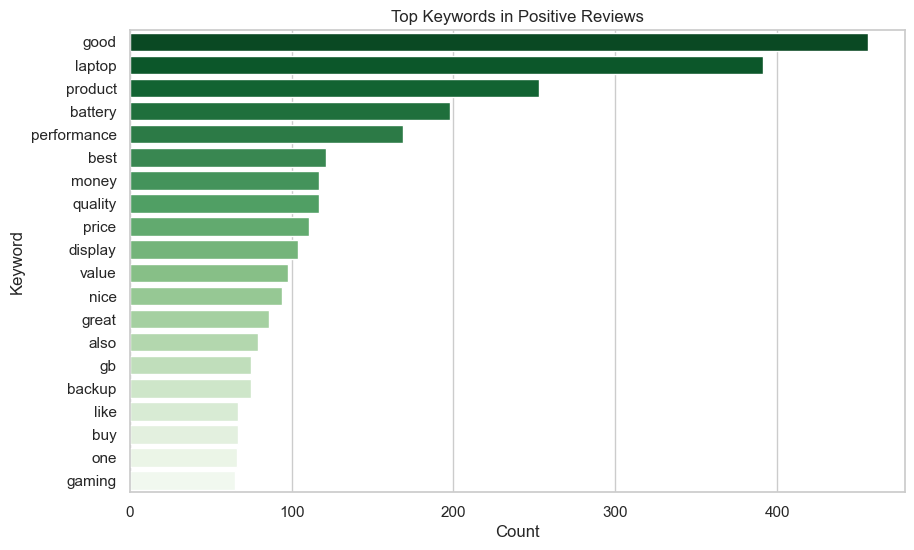

In [320]:
# Positive words frequency

pos_words, pos_counts = zip(*positive_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(pos_counts), y=list(pos_words), palette='Greens_r')
plt.title('Top Keywords in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

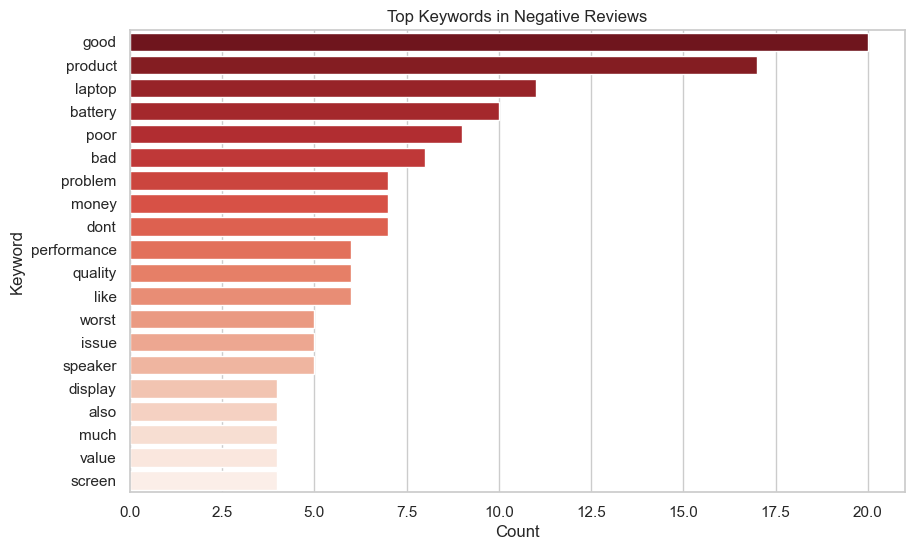

In [321]:
# Negative words frequency

neg_words, neg_counts = zip(*negative_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(neg_counts), y=list(neg_words), palette='Reds_r')
plt.title('Top Keywords in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

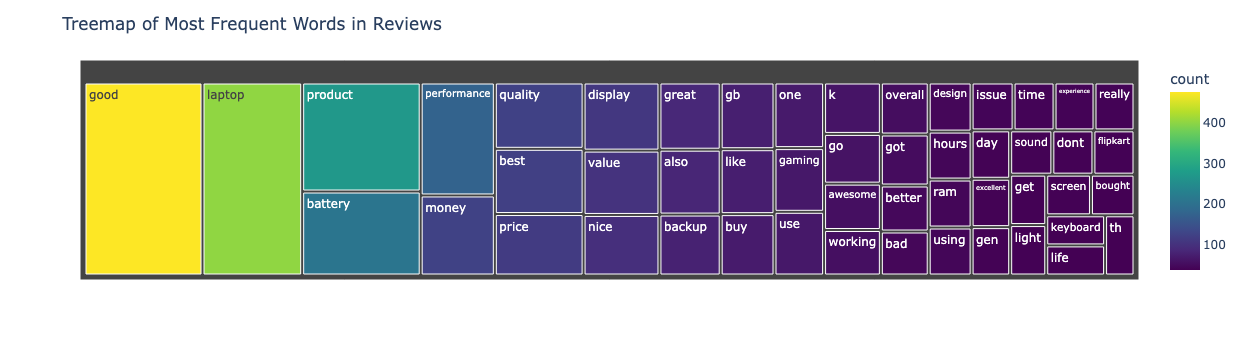

In [322]:
# Treemap for word frequency 

import plotly.express as px
from nltk.corpus import stopwords
import string

words = all_reviews.lower().translate(str.maketrans('', '', string.punctuation)).split()
filtered_words = [word for word in words if word not in stopwords.words('english')]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(50)
words_df = pd.DataFrame(top_words, columns=['word', 'count'])

fig = px.treemap(words_df, path=['word'], values='count',
                 color='count', color_continuous_scale='Viridis')
fig.update_layout(title='Treemap of Most Frequent Words in Reviews')
fig.show()

**N-gram (Bigram and Trigram) Analysis**

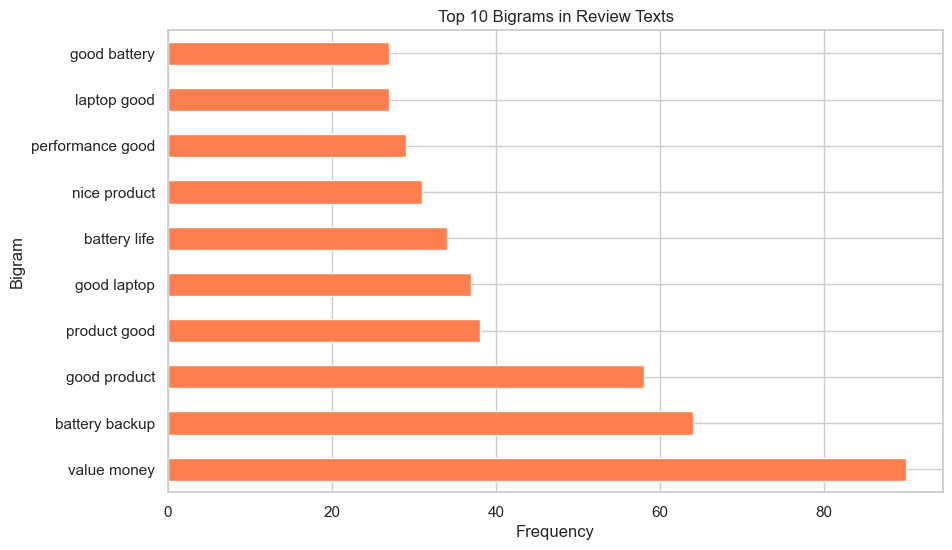

In [324]:
# Bigram

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer.fit_transform(df['Review_Texts'].dropna())

bigram_freq = pd.DataFrame(X_bigram.toarray(), columns=vectorizer.get_feature_names_out())
bigram_counts = bigram_freq.sum().sort_values(ascending=False).head(10)

bigram_counts.plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Top 10 Bigrams in Review Texts')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

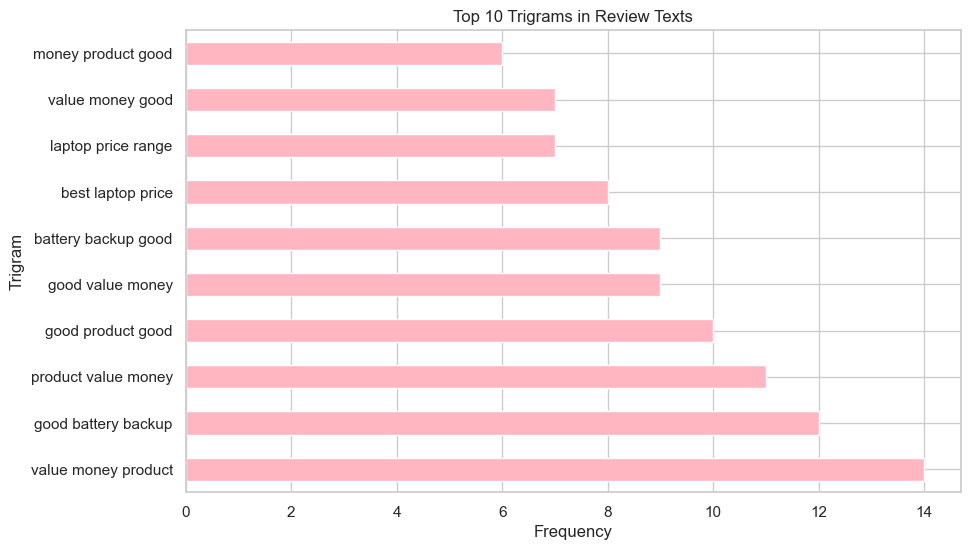

In [328]:
# Trigram
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_trigram = vectorizer.fit_transform(df['Review_Texts'].dropna())

trigram_freq = pd.DataFrame(X_trigram.toarray(), columns=vectorizer.get_feature_names_out())
trigram_counts = trigram_freq.sum().sort_values(ascending=False).head(10)

trigram_counts.plot(kind='barh', figsize=(10, 6), color='lightpink')
plt.title('Top 10 Trigrams in Review Texts') 
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

**Average Review Length Analysis**

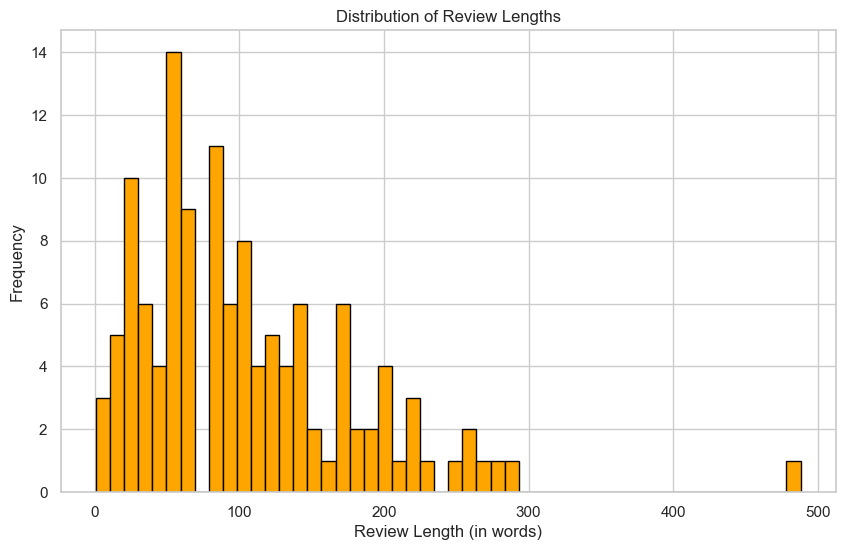

In [331]:
df['Review_Length'] = df['Review_Texts'].dropna().apply(lambda x: len(x.split()))

# Plotting histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Review_Length'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

### Topic Modeling (LDA)

In [334]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review_Texts'].dropna())

# Applying LDA (Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(", ".join(top_words))

Topic 0:
performance, windows, terms, issue, mac, tuf, apple, rtx, laptop, device
Topic 1:
good, laptop, performance, battery, product, money, gb, quality, display, great
Topic 2:
product, sale, bbd, laptop, quality, new, discount, performance, display, rtx
Topic 3:
laptop, product, good, money, buy, display, price, quality, great, battery
Topic 4:
good, product, laptop, battery, best, nice, performance, money, quality, price


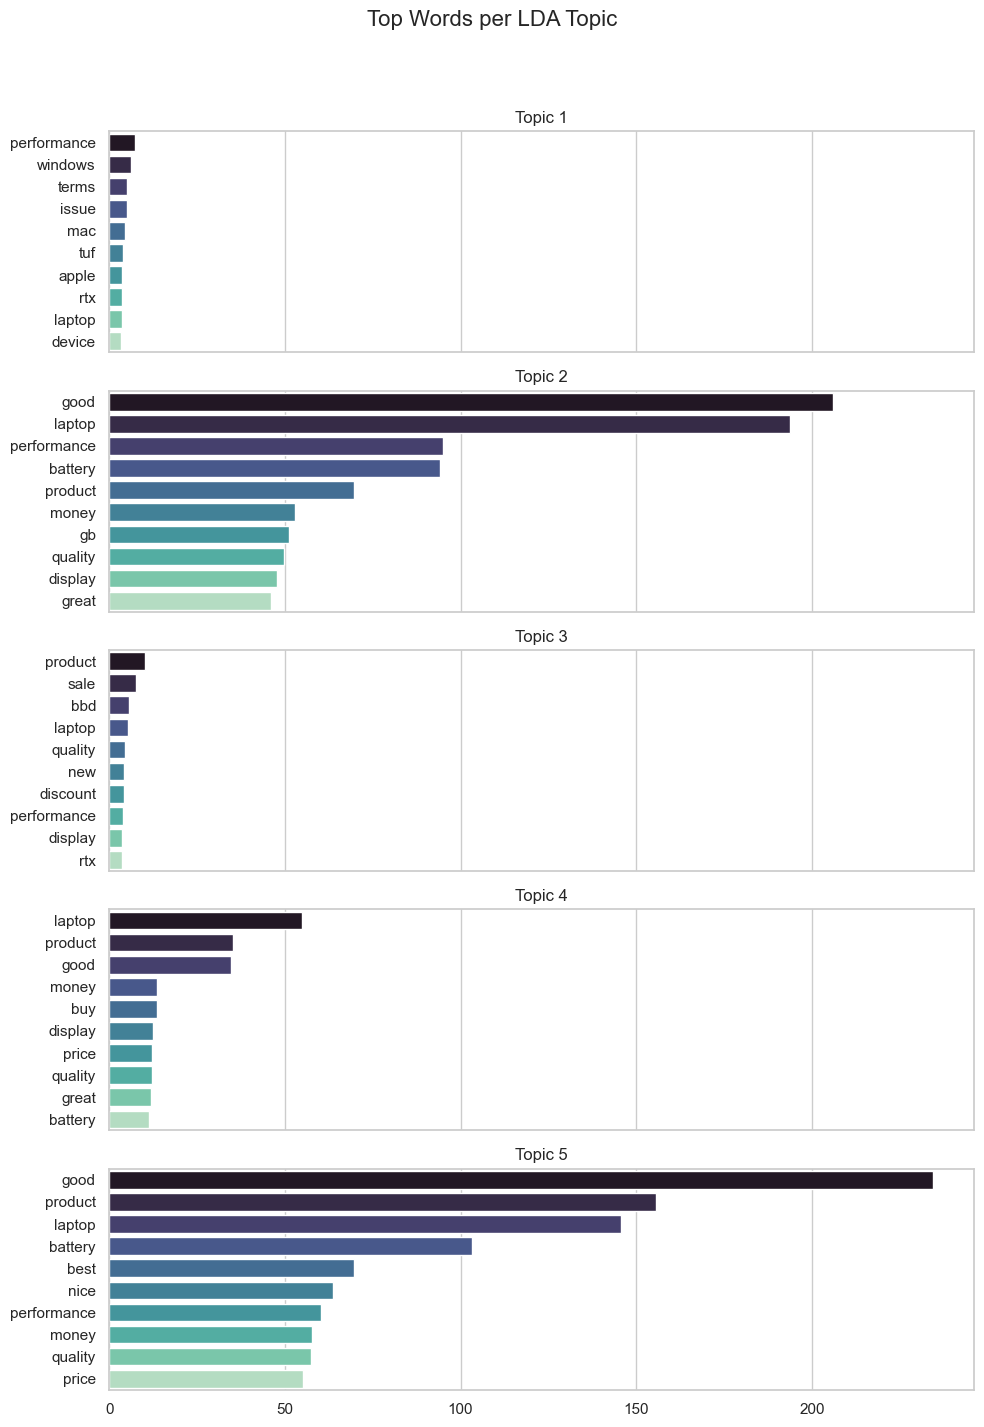

In [335]:
n_top_words = 10
n_topics = 5

fig, axes = plt.subplots(n_topics, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Top Words per LDA Topic', fontsize=16)

for idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-n_top_words:][::-1]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    top_weights = topic[top_indices]
    
    sns.barplot(x=top_weights, y=top_features, ax=axes[idx], palette='mako')
    axes[idx].set_title(f'Topic {idx + 1}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Clustering products using KMeans

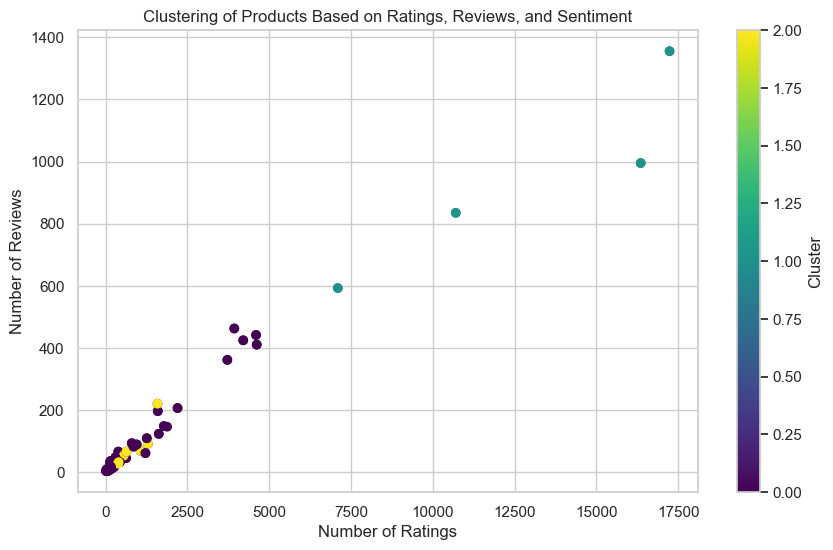

In [338]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_clustering = df[['No_of_Ratings', 'No_of_Reviews', 'Sentiment_Score']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(df_clustering['No_of_Ratings'], df_clustering['No_of_Reviews'], c=df_clustering['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Products Based on Ratings, Reviews, and Sentiment')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Reviews')
plt.colorbar(label='Cluster')
plt.show()

In [339]:
df.head()

Unique_ID                                        Product_URL  \
0         62  https://www.flipkart.com/lenovo-ideapad-slim-1...   
1         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
2         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
3         41  https://www.flipkart.com/hp-255-g10-2024-amd-r...   
4         71  https://www.flipkart.com/samsung-galaxy-book4-...   

                                       Product_Title    Brand  \
0  Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...   Lenovo   
1  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
2  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
3  HP 255 G10 (2024) AMD Ryzen 3 Quad Core 7320U ...       HP   
4  SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 13...  SAMSUNG   

                                        Model  \
0  IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 5500U   
1  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
2  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
3  255 G10 (2024) AMD Ryzen 3 Quad Core 7320U   
4   Galaxy Book4 Intel Core i5 13th Gen 1335U   

                     Specifications  No_of_Ratings  No_of_Reviews  \
0  16 GB/512 GB SSD/Windows 11 Home         1882.0          147.0   
1   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
2   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
3   8 GB/512 GB SSD/Windows 11 Home          133.0           15.0   
4  16 GB/512 GB SSD/Windows 11 Home         4620.0          411.0   

   Overall_Rating  Average_Rating  ...  Storage Storage_GB       OS_Version  \
0             4.2             4.4  ...   512 GB      512.0  Windows 11 Home   
1             4.3             5.0  ...   512 GB      512.0  Windows 11 Home   
2             4.3             4.6  ...   512 GB      512.0  Windows 11 Home   
3             4.3             4.6  ...   512 GB      512.0  Windows 11 Home   
4             4.5             4.9  ...   512 GB      512.0  Windows 11 Home   

  Price_per_GB_RAM Price_per_GB_Storage  Review_Engagement_Score  \
0         2061.875             2061.875                   2029.0   
1         3748.750             3748.750                    148.0   
2         3748.750             3748.750                    148.0   
3         3748.750             3748.750                    148.0   
4         4124.375             4124.375                   5031.0   

  Rating_per_1000_Price  Sentiment_Score Review_Sentiment  Review_Length  
0              0.133374           0.9977         Positive            258  
1              0.166722           0.9732         Positive             35  
2              0.153384           0.9911         Positive             64  
3              0.153384           0.0000          Neutral              1  
4              0.074254           0.9954         Positive            174  

[5 rows x 26 columns]

In [340]:
# df.to_csv('Laptops.csv', index=False)